In [1]:
import copy
from seaborn.utils import os, np, plt, pd
import seaborn as sns
from sklearn import preprocessing as s_prep
from matplotlib.transforms import Affine2D

In [2]:
pd.set_option('display.max_columns', 500,
             'display.precision', 2)

In [3]:
sns.set_style('darkgrid')

In [4]:
from project_methods import MSc_Proj as proj

In [5]:
# file_loc = proj.show_saved_csv()
# display(file_loc)

In [6]:
data_dir = os.getcwd() #'clean_pds//' #[str(k) for k, v in file_loc.items()][0]
data_dir

'W:\\MSc-AIDS-UoH\\Trimester_3\\Submit'

## OVERALL OBSERVATIONS in enroll.csv

In [7]:
fname = '\\enr_part_prof.csv'
main_df = pd.read_csv(data_dir+fname, low_memory=False)
display(main_df.info(), main_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55026 entries, 0 to 55025
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   subjid                       55026 non-null  object 
 1   ccdep                        55026 non-null  int64  
 2   ccdepage                     55026 non-null  float64
 3   cccog                        55026 non-null  int64  
 4   cccogage                     55026 non-null  float64
 5   ccapt                        55026 non-null  int64  
 6   ccaptage                     55026 non-null  float64
 7   ccmtr                        55026 non-null  int64  
 8   ccmtrage                     55026 non-null  float64
 9   weight                       55026 non-null  float64
 10  height                       55026 non-null  float64
 11  bmi                          55026 non-null  float64
 12  seq                          55026 non-null  int64  
 13  visdy           

None

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,feedself,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_bucket,baseline_age_above29,independent_feeding,behaviour_score,cognitive_score,visitnum,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,67.9,185.4,19.8,1,0,48,11,28,28,95,24,24,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,25,120,6,3. manifest,3. manifest,1,0,1,1,0,0,1,19,44
1,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,67.2,185.0,19.6,2,371,49,10,32,32,80,22,22,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,15,84,6,3. manifest,3. manifest,1,0,1,1,0,0,1,19,44
2,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,65.4,185.0,19.1,3,734,50,21,45,45,75,20,20,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,7,94,6,3. manifest,3. manifest,1,0,1,1,0,0,1,19,44
3,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,63.8,185.0,18.6,4,1098,51,18,45,45,65,12,12,8,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,11,57,6,3. manifest,3. manifest,1,0,1,1,0,0,1,19,44
4,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,62.5,185.0,18.3,5,1469,52,17,47,47,70,15,15,6,1,5.2,0. underweight,-1,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,6,27,6,3. manifest,3. manifest,1,0,1,1,0,0,1,19,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55021,R999989129,1,38.0,1,40.0,1,38.0,1,34.0,73.0,180.0,22.5,1,0,44,11,32,32,80,20,20,9,1,0.0,1. normal,0,-999.0,-999.0,30,[0.0 to 1.0),2. 40 - 49,1,1,24,155,1,3. manifest,3. manifest,1,0,1,1,0,1,1,19,45
55022,R999993234,1,48.0,0,0.0,1,50.0,0,0.0,57.0,168.0,20.2,1,0,47,0,0,0,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1,1,1,242,4,2. pre-manifest,2. pre-manifest,0,0,0,0,0,1,0,17,41
55023,R999993234,1,48.0,0,0.0,1,50.0,0,0.0,57.3,167.6,20.4,2,380,48,1,1,1,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1,1,9,239,4,2. pre-manifest,2. pre-manifest,0,0,0,0,0,1,0,17,41
55024,R999993234,1,48.0,0,0.0,1,50.0,0,0.0,57.0,167.0,20.4,3,777,49,2,2,2,100,25,25,13,1,3.2,1. normal,0,1.3,1.0,31,[1.0 to 2.0),2. 40 - 49,1,1,8,240,4,2. pre-manifest,2. pre-manifest,0,0,0,0,0,1,0,17,41


In [8]:
cond = (main_df['visitnum'] >= 6)
vis6_main_df = main_df.loc[cond].reset_index()
display(vis6_main_df)

,index,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,weight,height,bmi,seq,visdy,age,chorea_score,motscore,miscore,indepscl,fiscore,fascore,tfcscore,feedself,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_bucket,baseline_age_above29,independent_feeding,behaviour_score,cognitive_score,visitnum,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num
0,0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,67.9,185.4,19.8,1,0,48,11,28,28,95,24,24,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,25,120,6,3. manifest,3. manifest,1,0,1,1,0,0,1,19,44
1,1,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,67.2,185.0,19.6,2,371,49,10,32,32,80,22,22,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),2. 40 - 49,1,1,15,84,6,3. manifest,3. manifest,1,0,1,1,0,0,1,19,44
2,2,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,65.4,185.0,19.1,3,734,50,21,45,45,75,20,20,11,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,7,94,6,3. manifest,3. manifest,1,0,1,1,0,0,1,19,44
3,3,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,63.8,185.0,18.6,4,1098,51,18,45,45,65,12,12,8,1,5.2,1. normal,0,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,11,57,6,3. manifest,3. manifest,1,0,1,1,0,0,1,19,44
4,4,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,62.5,185.0,18.3,5,1469,52,17,47,47,70,15,15,6,1,5.2,0. underweight,-1,-2.3,-1.0,27,[-3.0 to -2.0),3. 50 - 59,1,1,6,27,6,3. manifest,3. manifest,1,0,1,1,0,0,1,19,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8267,54941,R99871078X,0,0.0,0,0.0,0,0.0,0,0.0,65.0,174.0,21.5,2,288,19,0,0,0,100,25,25,13,1,5.1,1. normal,0,1.3,1.0,31,[1.0 to 2.0),0. <30,0,1,3,252,6,2. pre-manifest,2. pre-manifest,0,0,0,0,0,0,1,19,47
8268,54942,R99871078X,0,0.0,0,0.0,0,0.0,0,0.0,63.0,174.0,20.8,3,721,20,0,0,0,100,25,25,13,1,5.1,1. normal,0,1.3,1.0,31,[1.0 to 2.0),0. <30,0,1,2,262,6,2. pre-manifest,2. pre-manifest,0,0,0,0,0,0,1,19,47
8269,54943,R99871078X,0,0.0,0,0.0,0,0.0,0,0.0,65.0,174.0,21.5,4,1057,21,0,0,0,100,25,25,13,1,5.1,1. normal,0,1.3,1.0,31,[1.0 to 2.0),0. <30,0,1,0,262,6,2. pre-manifest,2. pre-manifest,0,0,0,0,0,0,1,19,47
8270,54944,R99871078X,0,0.0,0,0.0,0,0.0,0,0.0,69.0,174.0,22.8,5,1458,22,0,0,0,100,25,25,13,1,5.1,1. normal,0,1.3,1.0,31,[1.0 to 2.0),0. <30,0,1,1,272,6,2. pre-manifest,2. pre-manifest,0,0,0,0,0,0,1,19,47


In [9]:
fname = '\\enrl_per_vis.csv'
all_vis = pd.read_csv(data_dir+fname)
display(all_vis.info(), all_vis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20620 entries, 0 to 20619
Columns: 306 entries, subjid to hd_status_vis_14
dtypes: float64(245), int64(16), object(45)
memory usage: 48.1+ MB


C:\Users\welcome\venv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (214,215,216,217,218,219,220,221,242,243,244,245,246,247,248,249,298,299,300,301,302,303,304,305) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


None

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,weight_vis_7,weight_vis_8,weight_vis_9,weight_vis_10,weight_vis_11,weight_vis_12,weight_vis_13,weight_vis_14,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,height_vis_7,height_vis_8,height_vis_9,height_vis_10,height_vis_11,height_vis_12,height_vis_13,height_vis_14,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,bmi_vis_7,bmi_vis_8,bmi_vis_9,bmi_vis_10,bmi_vis_11,bmi_vis_12,bmi_vis_13,bmi_vis_14,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,visdy_vis_7,visdy_vis_8,visdy_vis_9,visdy_vis_10,visdy_vis_11,visdy_vis_12,visdy_vis_13,visdy_vis_14,age_vis_1,age_vis_2,age_vis_3,age_vis_4,age_vis_5,age_vis_6,age_vis_7,age_vis_8,age_vis_9,age_vis_10,age_vis_11,age_vis_12,age_vis_13,age_vis_14,chorea_score_vis_1,chorea_score_vis_2,chorea_score_vis_3,chorea_score_vis_4,chorea_score_vis_5,chorea_score_vis_6,chorea_score_vis_7,chorea_score_vis_8,chorea_score_vis_9,chorea_score_vis_10,chorea_score_vis_11,chorea_score_vis_12,chorea_score_vis_13,chorea_score_vis_14,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,motscore_vis_7,motscore_vis_8,motscore_vis_9,motscore_vis_10,motscore_vis_11,motscore_vis_12,motscore_vis_13,motscore_vis_14,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,miscore_vis_7,miscore_vis_8,miscore_vis_9,miscore_vis_10,miscore_vis_11,miscore_vis_12,miscore_vis_13,miscore_vis_14,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,indepscl_vis_7,indepscl_vis_8,indepscl_vis_9,indepscl_vis_10,indepscl_vis_11,indepscl_vis_12,indepscl_vis_13,indepscl_vis_14,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fiscore_vis_7,fiscore_vis_8,fiscore_vis_9,fiscore_vis_10,fiscore_vis_11,fiscore_vis_12,fiscore_vis_13,fiscore_vis_14,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,fascore_vis_7,fascore_vis_8,fascore_vis_9,fascore_vis_10,fascore_vis_11,fascore_vis_12,fascore_vis_13,fascore_vis_14,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,tfcscore_vis_7,tfcscore_vis_8,tfcscore_vis_9,tfcscore_vis_10,tfcscore_vis_11,tfcscore_vis_12,tfcscore_vis_13,tfcscore_vis_14,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,feedself_vis_7,feedself_vis_8,feedself_vis_9,feedself_vis_10,feedself_vis_11,feedself_vis_12,feedself_vis_13,feedself_vis_14,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_level_vis_7,bmi_level_vis_8,bmi_level_vis_9,bmi_level_vis_10,bmi_level_vis_11,bmi_level_vis_12,bmi_level_vis_13,bmi_level_vis_14,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,bmi_outcome_vis_7,bmi_outcome_vis_8,bmi_outcome_vis_9,bmi_outcome_vis_10,bmi_outcome_vis_11,bmi_outcome_vis_12,bmi_outcome_vis_13,bmi_outcome_vis_14,age_bucket_vis_1,age_bucket_vis_2,age_bucket_vis_3,age_bucket_vis_4,age_bucket_vis_5,age_bucket_vis_6,age_bucket_vis_7,age_bucket_vis_8,age_bucket_vis_9,age_bucket_vis_10,age_bucket_vis_11,age_bucket_vis_12,age_bucket_vis_13,age_bucket_vis_14,independent_feeding_vis_1,independent_feeding_vis_2,independent_feeding_vis_3,independent_feeding_vis_4,independent_feeding_vis_5,independent_feeding_vis_6,independent_feeding_vis_7,independent_feeding_vis_8,independent_feeding_vis_9,independent_feeding_vis_10,independent_feeding_vis_11,independent_feeding_vis_12,independent_feeding_vis_13,independent_feeding_vis_14,behaviour_score_

In [10]:
fname = '\\only6_visits.csv'
first6_vis = pd.read_csv(data_dir+fname)
display(first6_vis.info(), first6_vis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Columns: 152 entries, subjid to hd_status_gen
dtypes: float64(105), int64(23), object(24)
memory usage: 1.5+ MB


None

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,age_vis_1,age_vis_2,age_vis_3,age_vis_4,age_vis_5,age_vis_6,chorea_score_vis_1,chorea_score_vis_2,chorea_score_vis_3,chorea_score_vis_4,chorea_score_vis_5,chorea_score_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,age_bucket_vis_1,age_bucket_vis_2,age_bucket_vis_3,age_bucket_vis_4,age_bucket_vis_5,age_bucket_vis_6,independent_feeding_vis_1,independent_feeding_vis_2,independent_feeding_vis_3,independent_feeding_vis_4,independent_feeding_vis_5,independent_feeding_vis_6,behaviour_score_vis_1,behaviour_score_vis_2,behaviour_score_vis_3,behaviour_score_vis_4,behaviour_score_vis_5,behaviour_score_vis_6,cognitive_score_vis_1,cognitive_score_vis_2,cognitive_score_vis_3,cognitive_score_vis_4,cognitive_score_vis_5,cognitive_score_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6,v1v6_bmi_diff,v1v6_bmi_change,caghigh_band,CAP,CCC,hd_status_gen
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,5.2,-2.3,-1.0,27,[-3.0 to -2.0),1,6,3. manifest,1,0,1,1,0,0,1,19,44,67.9,67.2,65.4,63.8,62.5,59.9,185.4,185.0,185.0,185.0,185.0,185.0,19.8,19.6,19.1,18.6,18.3,17.5,0.0,371.0,734.0,1098.0,1469.0,1911.0,48,49,50,51,52,53,11.0,10.0,21.0,18.0,17.0,28.0,28.0,32.0,45.0,45.0,47.0,60.0,28.0,32.0,45.0,45.0,47.0,60.0,95.0,80.0,75.0,65.0,70.0,65.0,24.0,22.0,20.0,12.0,15.0,7.0,24.0,22.0,20.0,12.0,15.0,7.0,11.0,11.0,11.0,8.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,0.0,1. normal,1. normal,1. normal,1. normal,0. underweight,0. underweight,0.0,0.0,0.0,0.0,-1.0,-1.0,2. 40 - 49,2. 40 - 49,3. 50 - 59,3. 50 - 59,3. 50 - 59,3. 50 - 59,1.0,1.0,1.0,1.0,1.0,1.0,25.0,15.0,7.0,11.0,6.0,1.0,120.0,84.0,94.0,57.0,27.0,35.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,-2.3,-1. decrease,3. full penetrance,2112.0,1,manifest
1,R00010372X,1,59.0,1,63.0,0,0.0,1,61.0,5.0,-3.6,-1.0,26,[-4.0 to -3.0),1,6,3. manifest,1,0,1,0,0,0,1,22,41,99.2,97.5,95.9,93.4,96.2,86.6,188.0,188.0,188.0,188.0,188.0,188.0,28.1,27.6,27.1,26.4,27.2,24.5,0.0,364.0,728.0,1084.0,1448.0,1815.0,64,65,66,67,68,69,8.0,7.0,9.0,13.0,13.0,7.0,20.0,16.0,25.0,32.0,31.0,25.0,20.0,16.0,25.0,32.0,31.0,25.0,90.0,90.0,80.0,80.0,75.0,75.0,25.0,25.0,23.0,22.0,21.0,20.0,25.0,25.0,23.0,22.0,21.0,20.0,13.0,11.0,10.0,9.0,10.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,2. overweight,2. overweight,2. overweight,2. overweight,2. overweight,1. normal,1.0,1.0,1.0,1.0,1.0,0.0,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,4. 60 - 69,1.0,1.0,1.0,1.0,1.0,1.0,2.0,13.0,2.0,1.0,2.0,0.0,178.0,142.0,152.0,167.0,139.0,149.0,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,3. manifest,-3.6,-1. decrease,3. full penetrance,2624.0,3,manifes

In [11]:
# include only baseline and last visit variables
first6_vis = proj.get_baseline_last_vis(first6_vis)
display(proj.null_checker(first6_vis, only_nulls=True))
display(proj.get_columns_with_pattern(first6_vis, 'vis_'), first6_vis)

# drop pps with missing variables
first6_vis = first6_vis.dropna().reset_index(drop=True)
display(first6_vis)

Series([], dtype: int64)

,age_vis_1,age_vis_6,age_bucket_vis_1,age_bucket_vis_6,behaviour_score_vis_1,behaviour_score_vis_6,bmi_vis_1,bmi_vis_6,bmi_level_vis_1,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_6,chorea_score_vis_1,chorea_score_vis_6,cognitive_score_vis_1,cognitive_score_vis_6,fascore_vis_1,fascore_vis_6,feedself_vis_1,feedself_vis_6,fiscore_vis_1,fiscore_vis_6,hd_status_vis_1,hd_status_vis_6,height_vis_1,height_vis_6,independent_feeding_vis_1,independent_feeding_vis_6,indepscl_vis_1,indepscl_vis_6,miscore_vis_1,miscore_vis_6,motscore_vis_1,motscore_vis_6,tfcscore_vis_1,tfcscore_vis_6,visdy_vis_1,visdy_vis_6,weight_vis_1,weight_vis_6
0,48,53,2. 40 - 49,3. 50 - 59,25.0,1.0,19.8,17.5,1. normal,0. underweight,0.0,-1.0,11.0,28.0,120.0,35.0,24.0,7.0,1.0,0.0,24.0,7.0,3. manifest,3. manifest,185.4,185.0,1.0,1.0,95.0,65.0,28.0,60.0,28.0,60.0,11.0,6.0,0.0,1911.0,67.9,59.9
1,64,69,4. 60 - 69,4. 60 - 69,2.0,0.0,28.1,24.5,2. overweight,1. normal,1.0,0.0,8.0,7.0,178.0,149.0,25.0,20.0,1.0,1.0,25.0,20.0,3. manifest,3. manifest,188.0,188.0,1.0,1.0,90.0,75.0,20.0,25.0,20.0,25.0,13.0,9.0,0.0,1815.0,99.2,86.6
2,51,56,3. 50 - 59,3. 50 - 59,0.0,18.0,20.8,24.3,1. normal,1. normal,0.0,0.0,22.0,22.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,3. manifest,3. manifest,170.0,170.0,0.0,0.0,20.0,10.0,109.0,116.0,109.0,116.0,1.0,0.0,0.0,1881.0,60.0,70.2
3,48,53,2. 40 - 49,3. 50 - 59,27.0,2.0,19.6,23.1,1. normal,1. normal,0.0,0.0,3.0,4.0,264.0,264.0,23.0,20.0,1.0,1.0,23.0,20.0,3. manifest,3. manifest,172.0,172.0,1.0,1.0,100.0,75.0,6.0,9.0,6.0,9.0,12.0,8.0,0.0,1911.0,58.0,68.2
4,43,48,2. 40 - 49,2. 40 - 49,10.0,6.0,36.7,23.7,3. obese,1. normal,1.0,0.0,5.0,4.0,108.0,36.0,19.0,1.0,1.0,0.0,19.0,1.0,3. manifest,3. manifest,186.0,186.0,1.0,0.0,80.0,30.0,45.0,64.0,45.0,64.0,8.0,1.0,0.0,2014.0,127.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,64,69,4. 60 - 69,4. 60 - 69,4.0,9.0,22.9,23.0,1. normal,1. normal,0.0,0.0,5.0,4.0,257.0,231.0,25.0,25.0,1.0,1.0,25.0,25.0,3. manifest,3. manifest,158.0,158.0,1.0,1.0,100.0,100.0,11.0,11.0,11.0,11.0,13.0,13.0,0.0,1912.0,57.2,57.4
1309,72,77,5. >69,5. >69,0.0,2.0,27.9,23.2,2. overweight,1. normal,1.0,0.0,0.0,0.0,248.0,262.0,25.0,25.0,1.0,1.0,25.0,25.0,5. family controls,5. family controls,165.0,163.0,1.0,1.0,100.0,100.0,0.0,1.0,0.0,1.0,13.0,13.0,0.0,1786.0,76.0,61.7
1310,57,62,3. 50 - 59,4. 60 - 69,21.0,60.0,27.0,28.6,2. overweight,2. overweight,1.0,1.0,0.0,2.0,231.0,228.0,25.0,24.0,1.0,1.0,25.0,24.0,2. pre-manifest,2. pre-manifest,157.5,158.8,1.0,1.0,100.0,95.0,5.0,7.0,5.0,7.0,13.0,9.0,0.0,1836.0,67.1,72.1
1311,46,51,2. 40 - 49,3. 50 - 59,0.0,0.0,19.5,20.8,1. normal,1. normal,0.0,0.0,0.0,0.0,218.0,227.0,24.0,24.0,1.0,1.0,24.0,24.0,2. pre-manifest,2. pre-manifest,164.0,164.0,1.0,1.0,100.0,100.0,0.0,0.0,0.0,0.0,13.0,13.0,0.0,1814.0,52.4,56.0


,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,v1v6_bmi_diff,v1v6_bmi_change,caghigh_band,CAP,CCC,hd_status_gen,age_vis_1,age_vis_6,age_bucket_vis_1,age_bucket_vis_6,behaviour_score_vis_1,behaviour_score_vis_6,bmi_vis_1,bmi_vis_6,bmi_level_vis_1,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_6,chorea_score_vis_1,chorea_score_vis_6,cognitive_score_vis_1,cognitive_score_vis_6,fascore_vis_1,fascore_vis_6,feedself_vis_1,feedself_vis_6,fiscore_vis_1,fiscore_vis_6,hd_status_vis_1,hd_status_vis_6,height_vis_1,height_vis_6,independent_feeding_vis_1,independent_feeding_vis_6,indepscl_vis_1,indepscl_vis_6,miscore_vis_1,miscore_vis_6,motscore_vis_1,motscore_vis_6,tfcscore_vis_1,tfcscore_vis_6,visdy_vis_1,visdy_vis_6,weight_vis_1,weight_vis_6
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,5.2,-2.3,-1.0,27,[-3.0 to -2.0),1,6,3. manifest,1,0,1,1,0,0,1,19,44,-2.3,-1. decrease,3. full penetrance,2112.0,1,manifest,48,53,2. 40 - 49,3. 50 - 59,25.0,1.0,19.8,17.5,1. normal,0. underweight,0.0,-1.0,11.0,28.0,120.0,35.0,24.0,7.0,1.0,0.0,24.0,7.0,3. manifest,3. manifest,185.4,185.0,1.0,1.0,95.0,65.0,28.0,60.0,28.0,60.0,11.0,6.0,0.0,1911.0,67.9,59.9
1,R00010372X,1,59.0,1,63.0,0,0.0,1,61.0,5.0,-3.6,-1.0,26,[-4.0 to -3.0),1,6,3. manifest,1,0,1,0,0,0,1,22,41,-3.6,-1. decrease,3. full penetrance,2624.0,3,manifest,64,69,4. 60 - 69,4. 60 - 69,2.0,0.0,28.1,24.5,2. overweight,1. normal,1.0,0.0,8.0,7.0,178.0,149.0,25.0,20.0,1.0,1.0,25.0,20.0,3. manifest,3. manifest,188.0,188.0,1.0,1.0,90.0,75.0,20.0,25.0,20.0,25.0,13.0,9.0,0.0,1815.0,99.2,86.6
2,R000458994,1,37.0,1,45.0,1,47.0,1,41.0,5.1,3.5,1.0,33,[3.0 to 4.0),1,6,3. manifest,1,0,1,1,1,0,0,17,45,3.5,1. increase,3. full penetrance,2295.0,4,manifest,51,56,3. 50 - 59,3. 50 - 59,0.0,18.0,20.8,24.3,1. normal,1. normal,0.0,0.0,22.0,22.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,3. manifest,3. manifest,170.0,170.0,0.0,0.0,20.0,10.0,109.0,116.0,109.0,116.0,1.0,0.0,0.0,1881.0,60.0,70.2
3,R001225384,1,45.0,1,44.0,0,0.0,1,45.0,5.2,3.5,1.0,33,[3.0 to 4.0),1,6,3. manifest,1,0,0,0,0,0,1,17,41,3.5,1. increase,3. full penetrance,1968.0,3,manifest,48,53,2. 40 - 49,3. 50 - 59,27.0,2.0,19.6,23.1,1. normal,1. normal,0.0,0.0,3.0,4.0,264.0,264.0,23.0,20.0,1.0,1.0,23.0,20.0,3. manifest,3. manifest,172.0,172.0,1.0,1.0,100.0,75.0,6.0,9.0,6.0,9.0,12.0,8.0,0.0,1911.0,58.0,68.2
4,R00170741X,1,44.0,1,41.0,1,41.0,1,35.0,6.3,-8.4,-1.0,21,[-9.0 to -8.0),1,7,3. manifest,1,0,1,0,0,0,1,18,47,-13.0,-1. decrease,3. full penetrance,2021.0,4,manifest,43,48,2. 40 - 49,2. 40 - 49,10.0,6.0,36.7,23.7,3. obese,1. normal,1.0,0.0,5.0,4.0,108.0,36.0,19.0,1.0,1.0,0.0,19.0,1.0,3. manifest,3. manifest,186.0,186.0,1.0,0.0,80.0,30.0,45.0,64.0,45.0,64.0,8.0,1.0,0.0,2014.0,127.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,R994514445,1,39.0,0,0.0,0,0.0,1,62.0,5.2,0.1,1.0,30,[0.0 to 1.0),1,6,3. manifest,1,0,0,0,0,0,0,18,40,0.1,1. increase,3. full penetrance,2560.0,2,manifest,64,69,4. 60 - 69,4. 60 - 69,4.0,9.0,22.9,23.0,1. normal,1. normal,0.0,0.0,5.0,4.0,257.0,231.0,25.0,25.0,1.0,1.0,25.0,25.0,3. manifest,3. manifest,158.0,158.0,1.0,1.0,100.0,100.0,11.0,11.0,11.0,11.0,13.0,13.0,0.0,1912.0,57.2,57.4
1309,R995458444,1,0.0,0,0.0,0,0.0,1,0.0,4.9,-4.7,-1.0,25,[-5.0 to -4.0),1,6,5. family controls,0,0,0,0,0,0,0,18,20,-4.7,-1. decrease,0. normal,1440.0,2,control,72,77,5. >69,5. >69,0.0,2.0,27.9,23.2,2. overweight,1. normal,1.0,0.0,0.0,0.0,248.0,262.0,25.0,25.0,1.0,1.0,25.0,25.0,5. family controls,5. family controls,165.0,163.0,1.0,1.0,100.0,100.0,0.0,1.0,0.0,1.0,13.0,13

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,v1v6_bmi_diff,v1v6_bmi_change,caghigh_band,CAP,CCC,hd_status_gen,age_vis_1,age_vis_6,age_bucket_vis_1,age_bucket_vis_6,behaviour_score_vis_1,behaviour_score_vis_6,bmi_vis_1,bmi_vis_6,bmi_level_vis_1,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_6,chorea_score_vis_1,chorea_score_vis_6,cognitive_score_vis_1,cognitive_score_vis_6,fascore_vis_1,fascore_vis_6,feedself_vis_1,feedself_vis_6,fiscore_vis_1,fiscore_vis_6,hd_status_vis_1,hd_status_vis_6,height_vis_1,height_vis_6,independent_feeding_vis_1,independent_feeding_vis_6,indepscl_vis_1,indepscl_vis_6,miscore_vis_1,miscore_vis_6,motscore_vis_1,motscore_vis_6,tfcscore_vis_1,tfcscore_vis_6,visdy_vis_1,visdy_vis_6,weight_vis_1,weight_vis_6
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,5.2,-2.3,-1.0,27,[-3.0 to -2.0),1,6,3. manifest,1,0,1,1,0,0,1,19,44,-2.3,-1. decrease,3. full penetrance,2112.0,1,manifest,48,53,2. 40 - 49,3. 50 - 59,25.0,1.0,19.8,17.5,1. normal,0. underweight,0.0,-1.0,11.0,28.0,120.0,35.0,24.0,7.0,1.0,0.0,24.0,7.0,3. manifest,3. manifest,185.4,185.0,1.0,1.0,95.0,65.0,28.0,60.0,28.0,60.0,11.0,6.0,0.0,1911.0,67.9,59.9
1,R00010372X,1,59.0,1,63.0,0,0.0,1,61.0,5.0,-3.6,-1.0,26,[-4.0 to -3.0),1,6,3. manifest,1,0,1,0,0,0,1,22,41,-3.6,-1. decrease,3. full penetrance,2624.0,3,manifest,64,69,4. 60 - 69,4. 60 - 69,2.0,0.0,28.1,24.5,2. overweight,1. normal,1.0,0.0,8.0,7.0,178.0,149.0,25.0,20.0,1.0,1.0,25.0,20.0,3. manifest,3. manifest,188.0,188.0,1.0,1.0,90.0,75.0,20.0,25.0,20.0,25.0,13.0,9.0,0.0,1815.0,99.2,86.6
2,R000458994,1,37.0,1,45.0,1,47.0,1,41.0,5.1,3.5,1.0,33,[3.0 to 4.0),1,6,3. manifest,1,0,1,1,1,0,0,17,45,3.5,1. increase,3. full penetrance,2295.0,4,manifest,51,56,3. 50 - 59,3. 50 - 59,0.0,18.0,20.8,24.3,1. normal,1. normal,0.0,0.0,22.0,22.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,3. manifest,3. manifest,170.0,170.0,0.0,0.0,20.0,10.0,109.0,116.0,109.0,116.0,1.0,0.0,0.0,1881.0,60.0,70.2
3,R001225384,1,45.0,1,44.0,0,0.0,1,45.0,5.2,3.5,1.0,33,[3.0 to 4.0),1,6,3. manifest,1,0,0,0,0,0,1,17,41,3.5,1. increase,3. full penetrance,1968.0,3,manifest,48,53,2. 40 - 49,3. 50 - 59,27.0,2.0,19.6,23.1,1. normal,1. normal,0.0,0.0,3.0,4.0,264.0,264.0,23.0,20.0,1.0,1.0,23.0,20.0,3. manifest,3. manifest,172.0,172.0,1.0,1.0,100.0,75.0,6.0,9.0,6.0,9.0,12.0,8.0,0.0,1911.0,58.0,68.2
4,R00170741X,1,44.0,1,41.0,1,41.0,1,35.0,6.3,-8.4,-1.0,21,[-9.0 to -8.0),1,7,3. manifest,1,0,1,0,0,0,1,18,47,-13.0,-1. decrease,3. full penetrance,2021.0,4,manifest,43,48,2. 40 - 49,2. 40 - 49,10.0,6.0,36.7,23.7,3. obese,1. normal,1.0,0.0,5.0,4.0,108.0,36.0,19.0,1.0,1.0,0.0,19.0,1.0,3. manifest,3. manifest,186.0,186.0,1.0,0.0,80.0,30.0,45.0,64.0,45.0,64.0,8.0,1.0,0.0,2014.0,127.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,R994514445,1,39.0,0,0.0,0,0.0,1,62.0,5.2,0.1,1.0,30,[0.0 to 1.0),1,6,3. manifest,1,0,0,0,0,0,0,18,40,0.1,1. increase,3. full penetrance,2560.0,2,manifest,64,69,4. 60 - 69,4. 60 - 69,4.0,9.0,22.9,23.0,1. normal,1. normal,0.0,0.0,5.0,4.0,257.0,231.0,25.0,25.0,1.0,1.0,25.0,25.0,3. manifest,3. manifest,158.0,158.0,1.0,1.0,100.0,100.0,11.0,11.0,11.0,11.0,13.0,13.0,0.0,1912.0,57.2,57.4
1309,R995458444,1,0.0,0,0.0,0,0.0,1,0.0,4.9,-4.7,-1.0,25,[-5.0 to -4.0),1,6,5. family controls,0,0,0,0,0,0,0,18,20,-4.7,-1. decrease,0. normal,1440.0,2,control,72,77,5. >69,5. >69,0.0,2.0,27.9,23.2,2. overweight,1. normal,1.0,0.0,0.0,0.0,248.0,262.0,25.0,25.0,1.0,1.0,25.0,25.0,5. family controls,5. family controls,165.0,163.0,1.0,1.0,100.0,100.0,0.0,1.0,0.0,1.0,13.0,13

In [12]:
proj.hd_status_guide

{2: '2. pre-manifest',
 3: '3. manifest',
 4: '4. genotype -ve',
 5: '5. family controls'}

In [13]:
# control
ctl = (first6_vis['hd_status0'].isin(['4. genotype -ve', '5. family controls']) &
       (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))
       
mctl = (first6_vis['hd_status0'].isin(['4. genotype -ve', '5. family controls']) &
        (first6_vis['baseline_age_above29'] == 1) &
        (first6_vis['is_male'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

fctl = (first6_vis['hd_status0'].isin(['4. genotype -ve', '5. family controls']) &
        (first6_vis['baseline_age_above29'] == 1) &
        (first6_vis['is_male'] == 0) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

control = first6_vis.loc[ctl].reset_index(drop=True)
male_control = first6_vis.loc[mctl]
female_control = first6_vis.loc[fctl]

# cag
nc = (control['caghigh_band'] == '0. normal')

ic = (control['caghigh_band'] == '1. intermediate') 

normcag_c = control.loc[nc].reset_index(drop=True)
intmcag_c= control.loc[ic].reset_index(drop=True)

display(control, len(male_control), len(female_control), len(normcag_c), len(intmcag_c))

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,v1v6_bmi_diff,v1v6_bmi_change,caghigh_band,CAP,CCC,hd_status_gen,age_vis_1,age_vis_6,age_bucket_vis_1,age_bucket_vis_6,behaviour_score_vis_1,behaviour_score_vis_6,bmi_vis_1,bmi_vis_6,bmi_level_vis_1,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_6,chorea_score_vis_1,chorea_score_vis_6,cognitive_score_vis_1,cognitive_score_vis_6,fascore_vis_1,fascore_vis_6,feedself_vis_1,feedself_vis_6,fiscore_vis_1,fiscore_vis_6,hd_status_vis_1,hd_status_vis_6,height_vis_1,height_vis_6,independent_feeding_vis_1,independent_feeding_vis_6,indepscl_vis_1,indepscl_vis_6,miscore_vis_1,miscore_vis_6,motscore_vis_1,motscore_vis_6,tfcscore_vis_1,tfcscore_vis_6,visdy_vis_1,visdy_vis_6,weight_vis_1,weight_vis_6
0,R002995975,1,0.0,0,0.0,0,0.0,1,0.0,6.2,1.9,1.0,31,[1.0 to 2.0),1,6,5. family controls,0,0,0,0,0,0,1,18,18,1.9,1. increase,0. normal,900.0,2,control,50,55,3. 50 - 59,3. 50 - 59,2.0,0.0,36.1,38.0,3. obese,3. obese,1.0,1.0,0.0,0.0,274.0,231.0,25.0,25.0,1.0,1.0,25.0,25.0,5. family controls,5. family controls,179.0,179.0,1.0,1.0,100.0,100.0,0.0,0.0,0.0,0.0,13.0,13.0,0.0,2247.0,115.6,121.6
1,R013633600,0,0.0,0,0.0,0,0.0,0,0.0,5.1,1.9,1.0,31,[1.0 to 2.0),1,6,4. genotype -ve,0,0,0,0,0,0,1,17,18,1.9,1. increase,0. normal,972.0,0,control,54,59,3. 50 - 59,3. 50 - 59,0.0,0.0,31.7,33.6,3. obese,3. obese,1.0,1.0,0.0,0.0,308.0,290.0,25.0,25.0,1.0,1.0,25.0,25.0,4. genotype -ve,4. genotype -ve,185.4,185.0,1.0,1.0,100.0,100.0,0.0,1.0,0.0,1.0,13.0,13.0,0.0,1855.0,108.9,114.9
2,R021820966,1,0.0,0,0.0,0,0.0,1,0.0,7.1,2.0,1.0,32,[2.0 to 3.0),1,8,5. family controls,0,0,0,0,0,1,1,15,17,3.2,1. increase,0. normal,867.0,2,control,51,56,3. 50 - 59,3. 50 - 59,0.0,1.0,23.7,26.9,1. normal,2. overweight,0.0,1.0,0.0,0.0,231.0,231.0,25.0,25.0,1.0,1.0,25.0,25.0,5. family controls,5. family controls,188.0,180.3,1.0,1.0,100.0,100.0,0.0,0.0,0.0,0.0,13.0,13.0,0.0,1782.0,83.9,87.5
3,R02679911X,0,0.0,0,0.0,0,0.0,0,0.0,6.2,-22.1,-1.0,7,[-23.0 to -22.0),1,7,4. genotype -ve,0,0,0,0,0,0,0,19,26,-23.9,-1. decrease,0. normal,936.0,0,control,36,41,1. 30 - 39,2. 40 - 49,0.0,0.0,42.3,18.4,4. severely obese,0. underweight,1.0,-1.0,0.0,0.0,319.0,299.0,25.0,25.0,1.0,1.0,25.0,25.0,4. genotype -ve,4. genotype -ve,161.3,161.0,1.0,1.0,100.0,100.0,0.0,0.0,0.0,0.0,13.0,13.0,0.0,1841.0,110.0,47.6
4,R026933811,0,0.0,0,0.0,0,0.0,0,0.0,5.0,1.7,1.0,31,[1.0 to 2.0),1,6,4. genotype -ve,0,0,0,0,0,0,0,17,17,1.7,1. increase,0. normal,1037.0,0,control,61,66,4. 60 - 69,4. 60 - 69,0.0,0.0,19.7,21.4,1. normal,1. normal,0.0,0.0,0.0,0.0,274.0,272.0,25.0,25.0,1.0,1.0,25.0,25.0,4. genotype -ve,4. genotype -ve,156.0,156.0,1.0,1.0,100.0,100.0,0.0,0.0,0.0,0.0,13.0,13.0,0.0,1819.0,48.0,52.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,R98296028X,1,0.0,0,0.0,0,0.0,1,0.0,5.9,1.2,1.0,31,[1.0 to 2.0),1,7,5. family controls,0,0,0,0,0,0,1,15,17,1.8,1. increase,0. normal,1037.0,2,control,61,66,4. 60 - 69,4. 60 - 69,8.0,4.0,28.0,29.8,2. overweight,2. overweight,1.0,1.0,0.0,0.0,180.0,249.0,25.0,24.0,1.0,1.0,25.0,24.0,5. family controls,5. family controls,177.8,175.3,1.0,1.0,100.0,100.0,4.0,1.0,4.0,1.0,13.0,11.0,0.0,1804.0,88.5,91.6
316,R983486749,1,0.0,0,0.0,0,0.0,1,0.0,5.0,1.6,1.0,31,[1.0 to 2.0),1,6,5. family controls,0,0,0,0,0,1,0,19,28,1.6,1. increase,1. intermediate,1624.0,2,control,58,63,3. 50 - 59,4. 60 - 69,11.0,4.0,22.7,24.3,1. normal,1. normal,0.0,0.0,0.0,0.0,188.0,229.0,25.0,25.0,1.0,1.0,25.0,25.0,5. family controls,5. family controls,157.0,157.0,1.0,1.0,100.0,100

115

205

303

17

In [14]:
# manifest
mnf = ((first6_vis['hd_status0'] == '3. manifest') &
       (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

mmnf = ((first6_vis['hd_status0'] == '3. manifest') &
        (first6_vis['baseline_age_above29'] == 1) &
        (first6_vis['is_male'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

fmnf = ((first6_vis['hd_status0'] == '3. manifest') &
        (first6_vis['baseline_age_above29'] == 1) &
        (first6_vis['is_male'] == 0) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))        

manifest = first6_vis.loc[mnf].reset_index(drop=True)
male_manifest = first6_vis.loc[mmnf]
female_manifest = first6_vis.loc[fmnf]

# reduced and full penetrance
rp = ((first6_vis['hd_status0'] == '3. manifest') &
      (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['caghigh_band'] == '2. reduced penetrance') &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

fp = ((first6_vis['hd_status0'] == '3. manifest') &
      (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['caghigh_band'] == '3. full penetrance') &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

redpen = first6_vis.loc[rp].reset_index(drop=True)
fulpen = first6_vis.loc[fp].reset_index(drop=True)

display(manifest['visitnum'].value_counts(), manifest, len(male_manifest), 
        len(female_manifest), len(redpen), len(fulpen))

6    432
7     97
8     17
Name: visitnum, dtype: int64

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,v1v6_bmi_diff,v1v6_bmi_change,caghigh_band,CAP,CCC,hd_status_gen,age_vis_1,age_vis_6,age_bucket_vis_1,age_bucket_vis_6,behaviour_score_vis_1,behaviour_score_vis_6,bmi_vis_1,bmi_vis_6,bmi_level_vis_1,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_6,chorea_score_vis_1,chorea_score_vis_6,cognitive_score_vis_1,cognitive_score_vis_6,fascore_vis_1,fascore_vis_6,feedself_vis_1,feedself_vis_6,fiscore_vis_1,fiscore_vis_6,hd_status_vis_1,hd_status_vis_6,height_vis_1,height_vis_6,independent_feeding_vis_1,independent_feeding_vis_6,indepscl_vis_1,indepscl_vis_6,miscore_vis_1,miscore_vis_6,motscore_vis_1,motscore_vis_6,tfcscore_vis_1,tfcscore_vis_6,visdy_vis_1,visdy_vis_6,weight_vis_1,weight_vis_6
0,R000024542,0,0.0,0,0.0,0,0.0,1,42.0,5.2,-2.3,-1.0,27,[-3.0 to -2.0),1,6,3. manifest,1,0,1,1,0,0,1,19,44,-2.3,-1. decrease,3. full penetrance,2112.0,1,manifest,48,53,2. 40 - 49,3. 50 - 59,25.0,1.0,19.8,17.5,1. normal,0. underweight,0.0,-1.0,11.0,28.0,120.0,35.0,24.0,7.0,1.0,0.0,24.0,7.0,3. manifest,3. manifest,185.4,185.0,1.0,1.0,95.0,65.0,28.0,60.0,28.0,60.0,11.0,6.0,0.0,1911.0,67.9,59.9
1,R00010372X,1,59.0,1,63.0,0,0.0,1,61.0,5.0,-3.6,-1.0,26,[-4.0 to -3.0),1,6,3. manifest,1,0,1,0,0,0,1,22,41,-3.6,-1. decrease,3. full penetrance,2624.0,3,manifest,64,69,4. 60 - 69,4. 60 - 69,2.0,0.0,28.1,24.5,2. overweight,1. normal,1.0,0.0,8.0,7.0,178.0,149.0,25.0,20.0,1.0,1.0,25.0,20.0,3. manifest,3. manifest,188.0,188.0,1.0,1.0,90.0,75.0,20.0,25.0,20.0,25.0,13.0,9.0,0.0,1815.0,99.2,86.6
2,R001225384,1,45.0,1,44.0,0,0.0,1,45.0,5.2,3.5,1.0,33,[3.0 to 4.0),1,6,3. manifest,1,0,0,0,0,0,1,17,41,3.5,1. increase,3. full penetrance,1968.0,3,manifest,48,53,2. 40 - 49,3. 50 - 59,27.0,2.0,19.6,23.1,1. normal,1. normal,0.0,0.0,3.0,4.0,264.0,264.0,23.0,20.0,1.0,1.0,23.0,20.0,3. manifest,3. manifest,172.0,172.0,1.0,1.0,100.0,75.0,6.0,9.0,6.0,9.0,12.0,8.0,0.0,1911.0,58.0,68.2
3,R00170741X,1,44.0,1,41.0,1,41.0,1,35.0,6.3,-8.4,-1.0,21,[-9.0 to -8.0),1,7,3. manifest,1,0,1,0,0,0,1,18,47,-13.0,-1. decrease,3. full penetrance,2021.0,4,manifest,43,48,2. 40 - 49,2. 40 - 49,10.0,6.0,36.7,23.7,3. obese,1. normal,1.0,0.0,5.0,4.0,108.0,36.0,19.0,1.0,1.0,0.0,19.0,1.0,3. manifest,3. manifest,186.0,186.0,1.0,0.0,80.0,30.0,45.0,64.0,45.0,64.0,8.0,1.0,0.0,2014.0,127.0,82.0
4,R003894598,1,48.0,0,0.0,0,0.0,1,43.0,6.6,-1.9,-1.0,28,[-2.0 to -1.0),1,8,3. manifest,1,0,1,0,0,0,1,23,44,-1.0,-1. decrease,3. full penetrance,2068.0,2,manifest,47,52,2. 40 - 49,3. 50 - 59,0.0,8.0,22.6,21.6,1. normal,1. normal,0.0,0.0,7.0,6.0,183.0,150.0,24.0,23.0,1.0,1.0,24.0,23.0,3. manifest,3. manifest,175.0,175.0,1.0,1.0,85.0,90.0,13.0,20.0,13.0,20.0,12.0,11.0,0.0,1657.0,69.2,66.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,R98492492X,0,0.0,1,38.0,1,43.0,1,37.0,5.8,0.4,1.0,30,[0.0 to 1.0),1,6,3. manifest,1,0,0,0,0,1,1,21,45,2.9,1. increase,3. full penetrance,1935.0,3,manifest,43,48,2. 40 - 49,2. 40 - 49,11.0,4.0,23.1,26.0,1. normal,2. overweight,0.0,1.0,7.0,7.0,150.0,103.0,22.0,24.0,1.0,1.0,22.0,24.0,3. manifest,3. manifest,189.0,189.0,1.0,1.0,85.0,90.0,30.0,33.0,30.0,33.0,9.0,11.0,0.0,1493.0,82.4,93.0
542,R987969439,1,46.0,0,0.0,1,68.0,1,51.0,5.1,-2.6,-1.0,27,[-3.0 to -2.0),1,6,3. manifest,1,0,0,0,0,0,1,20,41,-2.6,-1. decrease,3. full penetrance,2706.0,3,manifest,66,71,4. 60 - 69,5. >69,30.0,16.0,29.4,26.8,2. overweight,2. overweight,1.0,1.0,2.0,1.0,106.0,70.0,14.0,13.0,1.0,1.0,14.0,13.0,3. manifest,3. manifest,175.0,175.0,1.0,1.0,65.0,70.0,16.0,32.0,16.0,3

286

260

17

529

In [15]:
analyze_df = pd.concat([control, manifest], axis=0).sample(frac=1).reset_index(drop=True)
display(analyze_df)

,subjid,ccdep,ccdepage,cccog,cccogage,ccapt,ccaptage,ccmtr,ccmtrage,study_timeyr,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,baseline_age_above29,visitnum,hd_status0,baseline_manifest_hd,is_high_calorie,treated_chorea,tetrabenazine_use,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,v1v6_bmi_diff,v1v6_bmi_change,caghigh_band,CAP,CCC,hd_status_gen,age_vis_1,age_vis_6,age_bucket_vis_1,age_bucket_vis_6,behaviour_score_vis_1,behaviour_score_vis_6,bmi_vis_1,bmi_vis_6,bmi_level_vis_1,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_6,chorea_score_vis_1,chorea_score_vis_6,cognitive_score_vis_1,cognitive_score_vis_6,fascore_vis_1,fascore_vis_6,feedself_vis_1,feedself_vis_6,fiscore_vis_1,fiscore_vis_6,hd_status_vis_1,hd_status_vis_6,height_vis_1,height_vis_6,independent_feeding_vis_1,independent_feeding_vis_6,indepscl_vis_1,indepscl_vis_6,miscore_vis_1,miscore_vis_6,motscore_vis_1,motscore_vis_6,tfcscore_vis_1,tfcscore_vis_6,visdy_vis_1,visdy_vis_6,weight_vis_1,weight_vis_6
0,R747345298,1,46.0,0,0.0,0,0.0,1,57.0,6.1,-4.5,-1.0,25,[-5.0 to -4.0),1,7,3. manifest,1,0,1,0,0,0,0,25,40,-0.7,-1. decrease,3. full penetrance,2680.0,2,manifest,67,72,4. 60 - 69,5. >69,6.0,13.0,39.0,38.3,3. obese,3. obese,1.0,1.0,9.0,6.0,168.0,126.0,23.0,22.0,1.0,1.0,23.0,22.0,3. manifest,3. manifest,158.0,158.0,1.0,1.0,90.0,75.0,33.0,27.0,33.0,27.0,12.0,10.0,0.0,1805.0,97.4,95.7
1,R795629772,1,49.0,0,0.0,0,0.0,1,49.0,5.3,1.3,1.0,31,[1.0 to 2.0),1,6,3. manifest,1,0,0,0,0,1,0,18,41,1.3,1. increase,3. full penetrance,2419.0,2,manifest,59,64,3. 50 - 59,4. 60 - 69,14.0,4.0,18.4,19.7,0. underweight,1. normal,-1.0,0.0,23.0,21.0,223.0,128.0,19.0,18.0,1.0,1.0,19.0,18.0,3. manifest,3. manifest,165.0,165.0,1.0,1.0,75.0,75.0,52.0,79.0,52.0,79.0,8.0,7.0,0.0,1932.0,50.0,53.7
2,R366528115,1,0.0,0,0.0,0,0.0,1,0.0,5.9,0.9,1.0,30,[0.0 to 1.0),1,7,5. family controls,0,0,0,0,0,1,0,22,24,-0.1,-1. decrease,0. normal,1272.0,2,control,53,58,3. 50 - 59,3. 50 - 59,4.0,9.0,24.9,24.8,1. normal,1. normal,0.0,0.0,0.0,0.0,278.0,285.0,25.0,25.0,1.0,1.0,25.0,25.0,5. family controls,5. family controls,165.1,165.0,1.0,1.0,100.0,100.0,0.0,0.0,0.0,0.0,13.0,13.0,0.0,1936.0,68.0,67.6
3,R819202027,0,0.0,0,0.0,0,0.0,1,25.0,4.1,-1.5,-1.0,28,[-2.0 to -1.0),1,6,3. manifest,1,0,0,0,0,0,0,20,53,-1.5,-1. decrease,3. full penetrance,1855.0,1,manifest,35,40,1. 30 - 39,2. 40 - 49,0.0,0.0,21.6,20.1,1. normal,1. normal,0.0,0.0,3.0,2.0,87.0,80.0,17.0,0.0,1.0,0.0,17.0,0.0,3. manifest,3. manifest,164.0,164.0,1.0,0.0,75.0,25.0,42.0,77.0,42.0,77.0,8.0,0.0,0.0,1500.0,58.0,54.0
4,R089372327,1,23.0,1,63.0,1,71.0,1,61.0,6.1,-0.7,-1.0,29,[-1.0 to 0.0),1,6,3. manifest,1,0,1,1,0,1,0,25,40,-0.7,-1. decrease,3. full penetrance,2640.0,4,manifest,66,71,4. 60 - 69,5. >69,0.0,15.0,29.8,29.1,2. overweight,2. overweight,1.0,1.0,8.0,7.0,166.0,133.0,24.0,19.0,1.0,1.0,24.0,19.0,3. manifest,3. manifest,175.3,176.5,1.0,1.0,80.0,70.0,15.0,17.0,15.0,17.0,10.0,7.0,0.0,2226.0,91.6,90.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,R648425248,1,45.0,0,0.0,0,0.0,1,56.0,7.1,-1.2,-1.0,28,[-2.0 to -1.0),1,8,3. manifest,1,0,0,0,0,0,1,23,42,-0.4,-1. decrease,3. full penetrance,2562.0,2,manifest,61,66,4. 60 - 69,4. 60 - 69,1.0,20.0,25.0,24.6,2. overweight,1. normal,1.0,0.0,6.0,12.0,104.0,83.0,25.0,23.0,1.0,1.0,25.0,23.0,3. manifest,3. manifest,180.0,176.0,1.0,1.0,100.0,95.0,22.0,29.0,22.0,29.0,12.0,11.0,0.0,1998.0,81.0,76.2
862,R863347520,1,0.0,0,0.0,0,0.0,1,0.0,6.0,0.9,1.0,30,[0.0 to 1.0),1,7,5. family controls,0,0,0,0,0,0,0,17,19,-1.3,-1. decrease,0. normal,1121.0,2,control,59,64,3. 50 - 59,4. 60 - 69,4.0,0.0,20.9,19.6,1. normal,1. normal,0.0,0.0,0.0,0.0,223.0,252.0,25.0,25.0,1.0,1.0,25.0,25.0,5. family controls,5. family controls,173.0,172.0,1.0,1.0,100.0,100.0,0.0,0.0,0.

#### Baseline Vs. Fifth Follow-up Average BMI per CAG Band

In [16]:
analyze_df.loc[:, 'hd_status_gen'] = analyze_df['hd_status_vis_1'].apply(lambda x: x.split('. ')[-1] if x == '3. manifest' else 'control')
display(analyze_df['hd_status_gen'])
analyze_df.loc[:, 'caghigh_band_gen'] = analyze_df['caghigh_band'].apply(lambda x: x.split('. ')[-1] 
                                                                         if 'reduced' in x or 'full' in x else 'control')
display(analyze_df['caghigh_band_gen'])

0      manifest
1      manifest
2       control
3      manifest
4      manifest
         ...   
861    manifest
862     control
863    manifest
864    manifest
865     control
Name: hd_status_gen, Length: 866, dtype: object

0      full penetrance
1      full penetrance
2              control
3      full penetrance
4      full penetrance
            ...       
861    full penetrance
862            control
863    full penetrance
864    full penetrance
865            control
Name: caghigh_band_gen, Length: 866, dtype: object

['control', 'manifest'] ['control', 'reduced penetrance', 'full penetrance']


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'BMI per Subject Category (Fifth follow-up)'}, xlabel='Subject category', ylabel='BMI (Fifth follow-up)'>

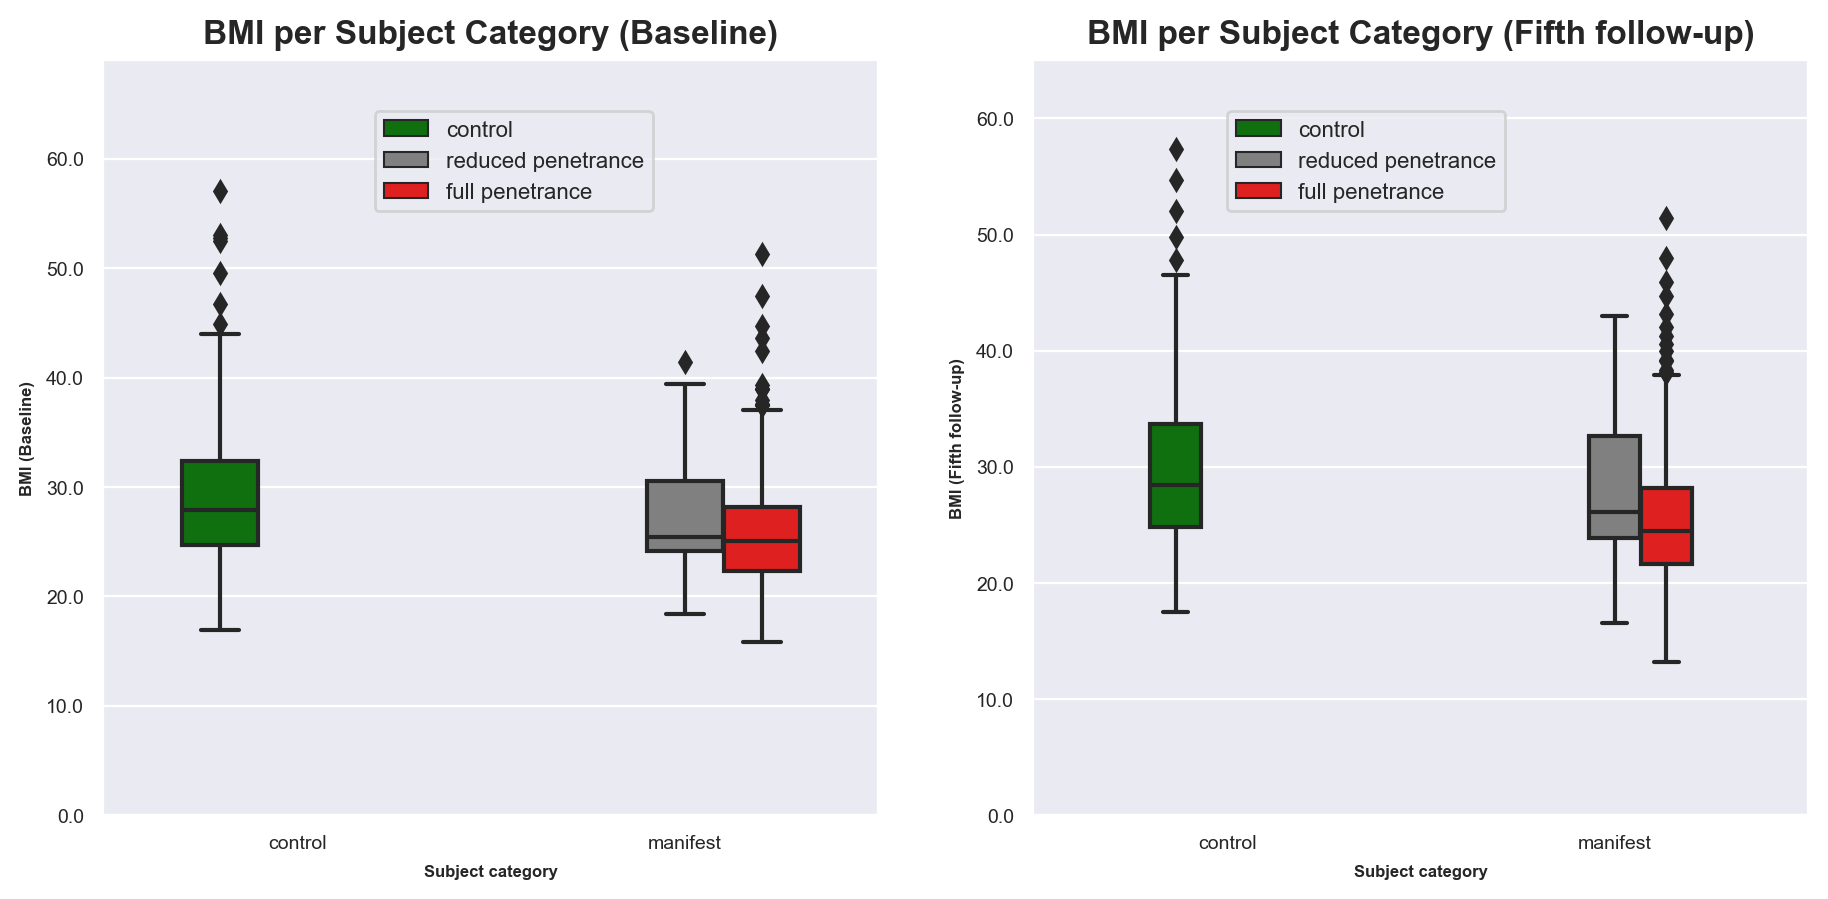

In [17]:
x, y, z = 'hd_status_gen', 'bmi_vis_1', 'caghigh_band_gen'
corder = ['control', 'reduced penetrance', 'full penetrance']
xorder = [c for c in sorted(analyze_df[x].unique())]
print(xorder, corder)
cmap = {'control':'green', 'reduced penetrance':'gray', 'full penetrance':'red'}

fig, (l, r) = plt.subplots(1, 2, figsize=[11, 5], dpi=200)

proj.plot_box(axis=l, x=analyze_df[x], y=analyze_df[y], condition_on=analyze_df[z], orientation='v', 
             plot_title="BMI per Subject Category (Baseline)", paletter=cmap,
             condition_order=corder, x_labe_order=xorder, x_labe='Subject category', y_labe='BMI (Baseline)', 
             box_width=0.6, show_legend_at=[0.35, 0.8], legend_size=8, y_lim=[0, 69])

x, y, z = 'hd_status_gen', 'bmi_vis_6', 'caghigh_band_gen'
proj.plot_box(axis=r, x=analyze_df[x], y=analyze_df[y], condition_on=analyze_df[z], orientation='v', 
             plot_title="BMI per Subject Category (Fifth follow-up)", paletter=cmap,
             condition_order=corder, x_labe_order=xorder, x_labe='Subject category', y_labe='BMI (Fifth follow-up)', 
             box_width=0.4, show_legend_at=[0.25, 0.8], legend_size=8, y_lim=[0, 65])

['control', 'manifest'] ['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'BMI per Participant Category\n(Fifth follow-up)'}, xlabel='Patricipant category', ylabel='BMI (Fifth follow-up)'>

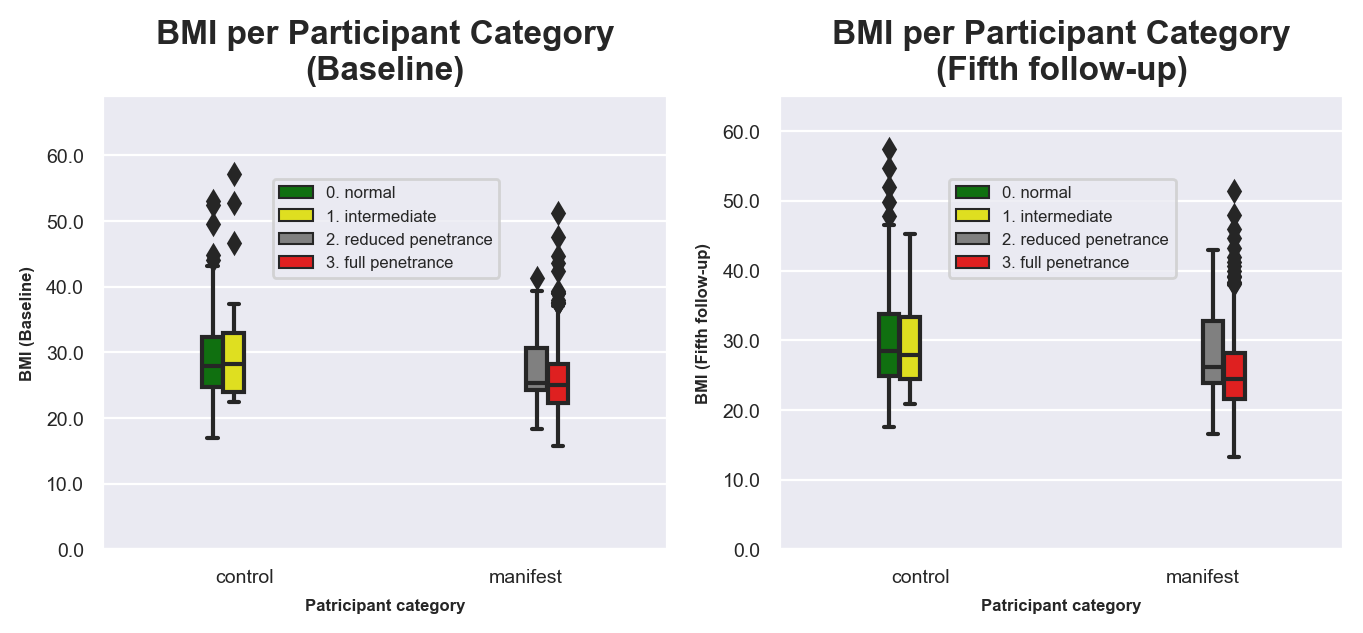

In [18]:
x, y, z = 'hd_status_gen', 'bmi_vis_1', 'caghigh_band'
corder = [c for c in sorted(analyze_df[z].unique())]
xorder = [c for c in sorted(analyze_df[x].unique())]
print(xorder, corder)

fig, (l, r) = plt.subplots(1, 2, figsize=[8, 3], dpi=200)

proj.plot_box(axis=l, x=analyze_df[x], y=analyze_df[y], condition_on=analyze_df[z], orientation='v', 
             plot_title="BMI per Participant Category\n(Baseline)", paletter=proj.cagrepeat_band_cmap,
             condition_order=corder, x_labe_order=xorder, x_labe='Patricipant category', y_labe='BMI (Baseline)', 
             box_width=0.3, show_legend_at=[0.3, 0.6], legend_size=6, y_lim=[0, 69])

x, y, z = 'hd_status_gen', 'bmi_vis_6', 'caghigh_band'
proj.plot_box(axis=r, x=analyze_df[x], y=analyze_df[y], condition_on=analyze_df[z], orientation='v', 
             plot_title="BMI per Participant Category\n(Fifth follow-up)", paletter=proj.cagrepeat_band_cmap,
             condition_order=corder, x_labe_order=xorder, x_labe='Patricipant category', y_labe='BMI (Fifth follow-up)', 
             box_width=0.3, show_legend_at=[0.3, 0.6], legend_size=6, y_lim=[0, 65])

['0. underweight', '1. normal', '2. overweight', '3. obese', '4. severely obese']


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Fifth Follow-up BMI per Participant Category'}, xlabel='HD Subject Category', ylabel='BMI (Fifth Follow-up)'>

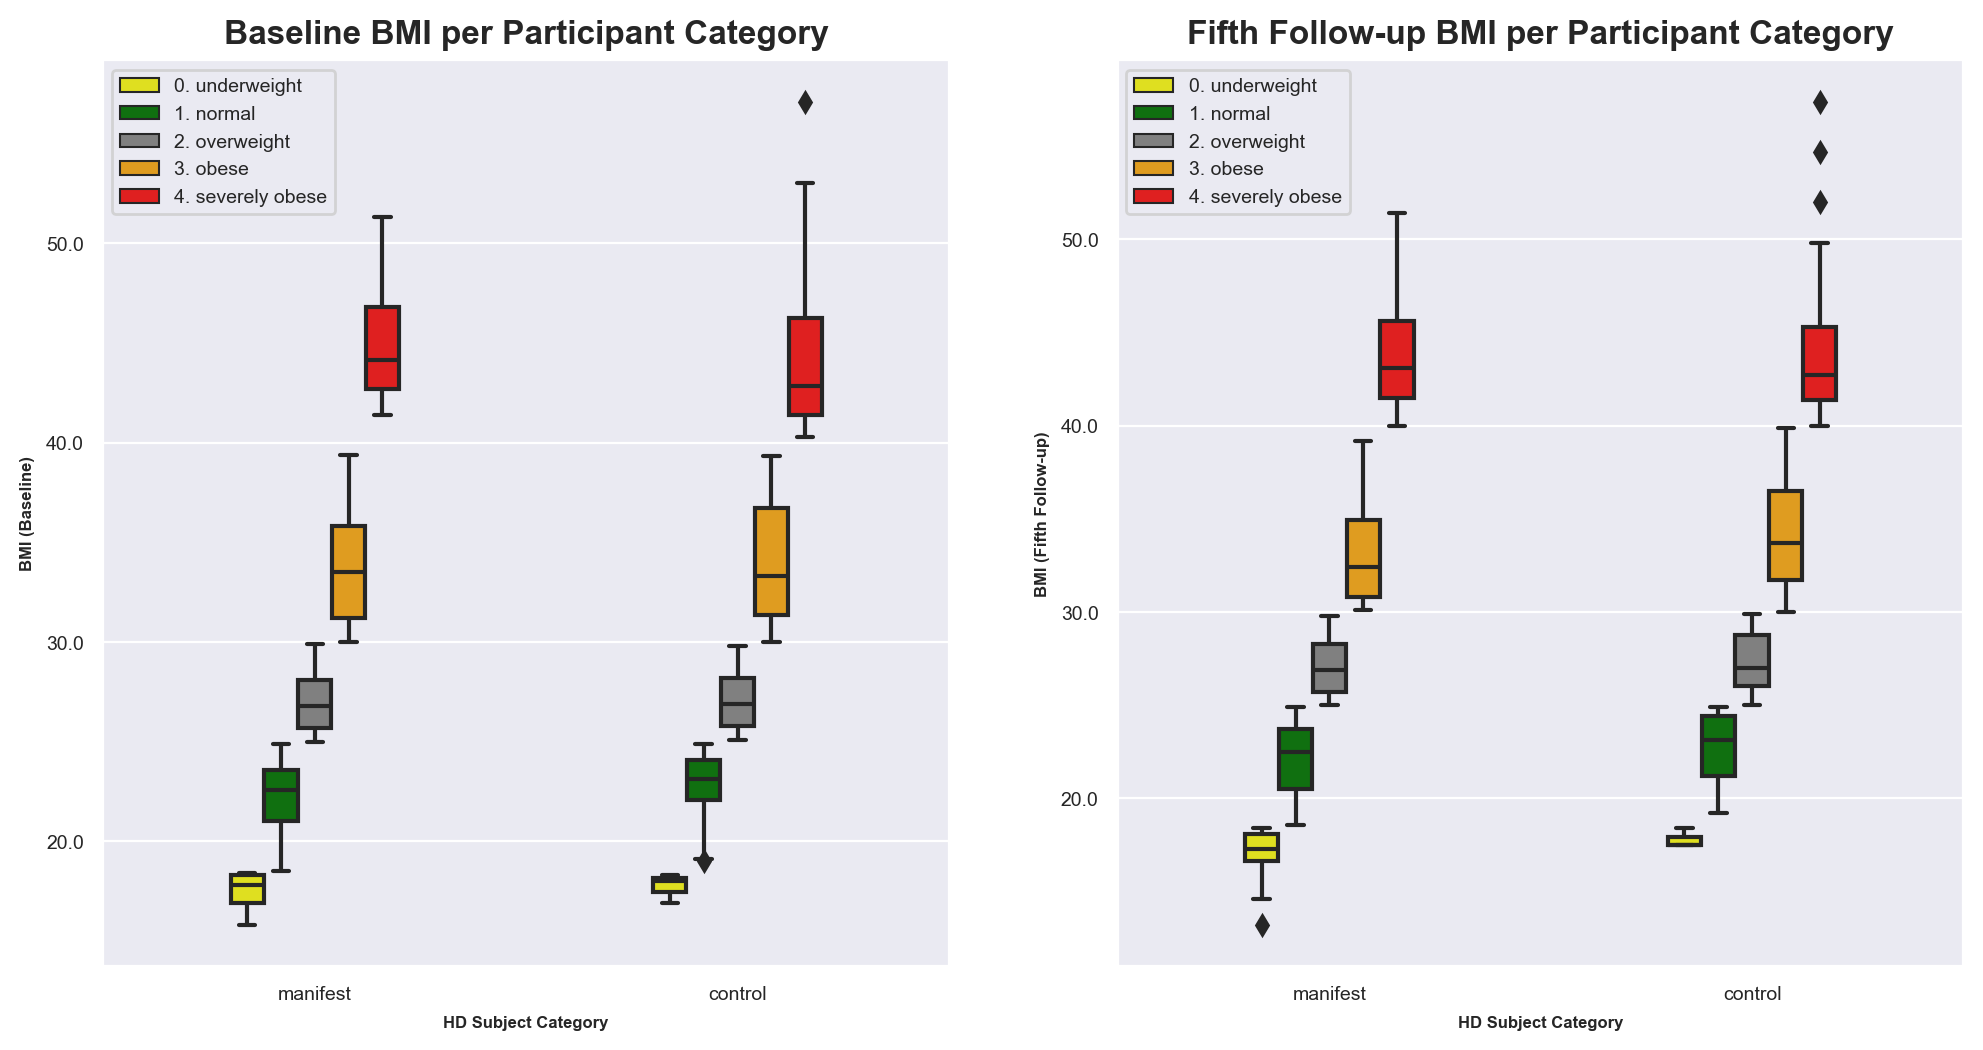

In [19]:
x, y, z = 'hd_status_gen', 'bmi_vis_1', 'bmi_level_vis_1'
corder = sorted(analyze_df[z].unique())
cmap = {'0. underweight': 'yellow', '1. normal': 'green', 
        '2. overweight': 'gray', '3. obese': 'orange', '4. severely obese': 'red'}
print(corder)

fig, (l, r) = plt.subplots(1, 2, figsize=[12, 6], dpi=200)
proj.plot_box(axis=l, x=analyze_df[x], y=analyze_df[y], condition_on=analyze_df[z], condition_order=corder,
             plot_title="Baseline BMI per Participant Category", x_labe='HD Subject Category', y_labe='BMI (Baseline)',
             box_width=0.4, paletter=cmap, show_legend_at=[0.01, 0.83], legend_size=7)

y, z = 'bmi_vis_6', 'bmi_level_vis_6'
proj.plot_box(axis=r, x=analyze_df[x], y=analyze_df[y], condition_on=analyze_df[z], condition_order=corder,
             plot_title="Fifth Follow-up BMI per Participant Category",  x_labe='HD Subject Category', 
              y_labe='BMI (Fifth Follow-up)', box_width=0.4, paletter=cmap, show_legend_at=[0.01, 0.83], legend_size=7)

['0. underweight', '1. normal', '2. overweight', '3. obese', '4. severely obese']


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'BMI per Baseline BMI Class'}, xlabel='BMI class (baseline)', ylabel='BMI (Fifth Follow-up)'>

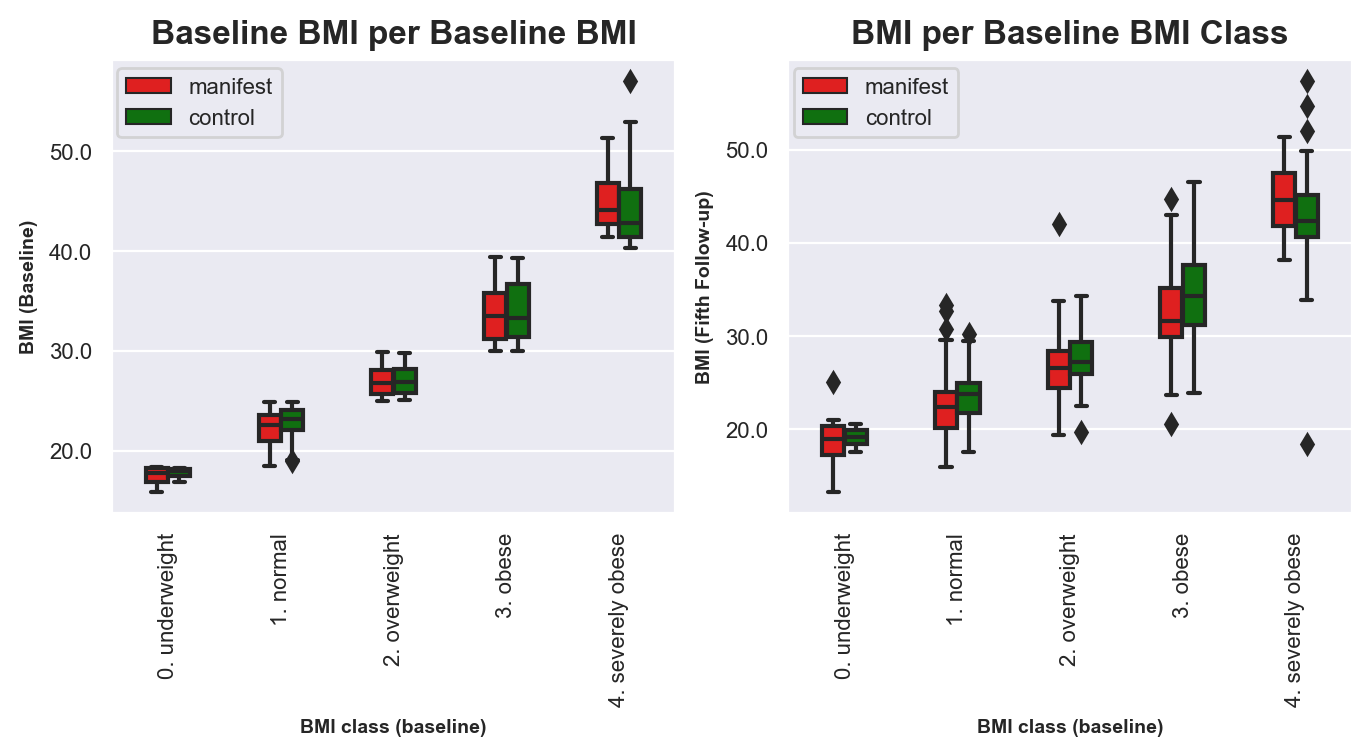

In [20]:
x, y, z = 'hd_status_gen', 'bmi_vis_1', 'bmi_level_vis_1'
xorder = sorted(analyze_df[z].unique())
# cmap = {'0. underweight': 'yellow', '1. normal': 'green', 
#         '2. overweight': 'gray', '3. obese': 'orange', '4. severely obese': 'red'}
cmap = {'manifest':'red', 'control':'green'}
print(corder)

fig, (l, r) = plt.subplots(1, 2, figsize=[8, 3], dpi=200)
proj.plot_box(axis=l, x=analyze_df[z], y=analyze_df[y], condition_on=analyze_df[x], x_labe_order=xorder,
             plot_title="Baseline BMI per Baseline BMI", x_labe='BMI class (baseline)', y_labe='BMI (Baseline)',
              xy_labe_size=7, xy_ticksize=8, rotate_xticklabe=90,
             box_width=0.4, paletter=cmap, show_legend_at=[0.01, 0.83], legend_size=8)

y, z = 'bmi_vis_6', 'bmi_level_vis_1'
proj.plot_box(axis=r, x=analyze_df[z], y=analyze_df[y], condition_on=analyze_df[x], x_labe_order=xorder,
             plot_title="BMI per Baseline BMI Class",  x_labe='BMI class (baseline)', 
              xy_labe_size=7, xy_ticksize=8, rotate_xticklabe=90,
              y_labe='BMI (Fifth Follow-up)', box_width=0.4, paletter=cmap, show_legend_at=[0.01, 0.83], legend_size=8)

### VARIABLE ANALYSIS PER  VISIT

9       9
10     16
12     13
13      1
14     11
15    124
16     85
17    483
18    186
19    110
20     83
21     48
22     33
23     30
24     23
25     16
26     11
27     10
28      5
29     16
Name: caglow_num, dtype: int64

15      9
16      4
17     93
18     56
19     47
20     36
21     23
22     15
23     13
24     19
25      4
26      6
27      2
28      1
29      3
30      5
31      1
32      2
33      1
34      1
35      2
37      3
38     12
39     41
40     92
41    167
42    162
43    156
44     95
45     80
46     41
47     41
48     16
49     12
50     17
51      8
52      5
53      4
54      5
55      3
56      4
58      1
60      2
61      1
63      1
65      1
Name: caghigh_num, dtype: int64

[Text(0.5, 1.0, 'CAG-high Distribution')]

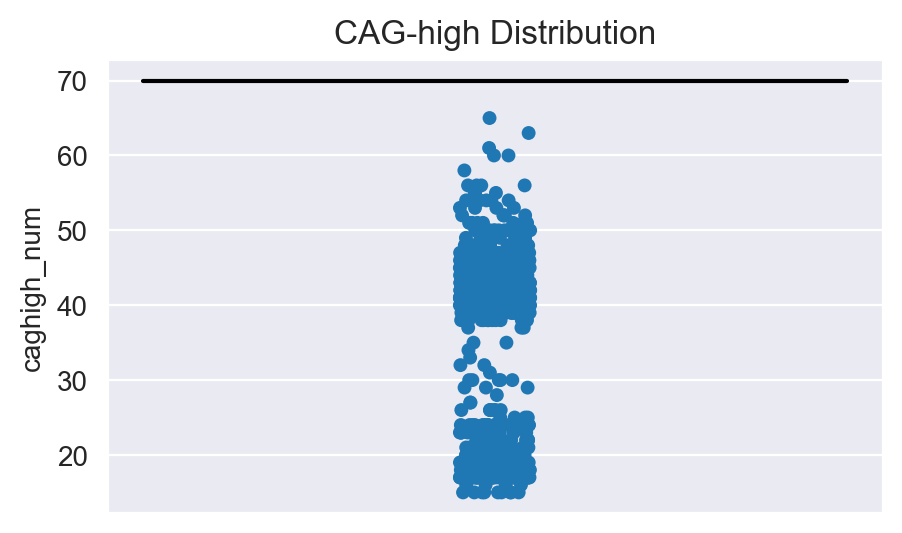

In [21]:
ch, cl = first6_vis['caghigh_num'].value_counts().sort_index(), first6_vis['caglow_num'].value_counts().sort_index()
display(cl, ch)

fig, ax1 = plt.subplots(figsize=[5, 3], dpi=200)
sns.stripplot(y=first6_vis['caghigh_num'], ax=ax1)
proj.plot_line(x=[-1, 1], y=[70, 70], color='black', axis=ax1)
plt.setp(ax1, title='CAG-high Distribution', )

In [22]:
cols = ['subjid', 'caglow_num', 'caghigh_num']
first6_vis[cols].apply(lambda row: 1 if (row[cols[1]] > 28) and (row[cols[-1]] > 70) else 0,
                      axis=1).sum()

0

#### Average BMI per BMI Class

In [23]:
cols = ['bmi_level_vis_1', 'bmi_vis_1']
mnf_avg = manifest[cols].groupby(cols[0]).describe().round(1)
ctrl_avg = control[cols].groupby(cols[0]).describe().round(1)
for name,avg in {'manifest_stats':mnf_avg, 'control_stats':ctrl_avg}.items():
    print(name)
    display(avg)
    print('\n\n')

manifest_stats


bmi_vis_1                                         
                      count  mean  std   min   25%   50%   75%   max
bmi_level_vis_1                                                     
0. underweight         21.0  17.6  0.8  15.8  16.9  17.8  18.3  18.4
1. normal             245.0  22.2  1.7  18.5  21.0  22.6  23.6  24.9
2. overweight         183.0  27.0  1.4  25.0  25.7  26.8  28.1  29.9
3. obese               91.0  33.7  2.7  30.0  31.2  33.5  35.8  39.4
4. severely obese       6.0  45.2  3.7  41.4  42.7  44.2  46.8  51.3




control_stats


bmi_vis_1                                         
                      count  mean  std   min   25%   50%   75%   max
bmi_level_vis_1                                                     
0. underweight          3.0  17.7  0.7  16.9  17.4  18.0  18.2  18.3
1. normal              88.0  22.9  1.6  19.0  22.1  23.2  24.1  24.9
2. overweight         100.0  27.0  1.4  25.1  25.8  26.9  28.2  29.8
3. obese              107.0  34.0  3.0  30.0  31.4  33.3  36.7  39.3
4. severely obese      22.0  44.8  4.9  40.3  41.4  42.8  46.2  57.1

In [24]:
cols = ['bmi_level_vis_6', 'bmi_vis_6']
mnf_avg = manifest[cols].groupby(cols[0]).describe().round(1)
ctrl_avg = control[cols].groupby(cols[0]).describe().round(1)
for name,avg in {'manifest_stats':mnf_avg, 'control_stats':ctrl_avg}.items():
    print(name)
    display(avg)
    print('\n\n')

manifest_stats


bmi_vis_6                                         
                      count  mean  std   min   25%   50%   75%   max
bmi_level_vis_6                                                     
0. underweight         31.0  17.1  1.1  13.2  16.6  17.3  18.1  18.4
1. normal             268.0  22.2  1.8  18.6  20.5  22.5  23.7  24.9
2. overweight         153.0  27.1  1.5  25.0  25.7  26.9  28.3  29.8
3. obese               84.0  33.2  2.7  30.1  30.8  32.4  35.0  39.2
4. severely obese      10.0  44.0  3.6  40.0  41.5  43.1  45.6  51.4




control_stats


bmi_vis_6                                         
                      count  mean  std   min   25%   50%   75%   max
bmi_level_vis_6                                                     
0. underweight          3.0  17.8  0.5  17.5  17.5  17.5  18.0  18.4
1. normal              84.0  22.8  1.7  19.2  21.2  23.2  24.4  24.9
2. overweight         103.0  27.3  1.5  25.0  26.0  27.0  28.8  29.9
3. obese              101.0  34.2  2.9  30.0  31.7  33.7  36.5  39.9
4. severely obese      29.0  44.2  4.4  40.0  41.4  42.7  45.3  57.4

#### Average BMI per CAG repeats

In [25]:
cols = ['caghigh_band', 'bmi_vis_1']
mnf_avg = manifest[cols].groupby(cols[0]).describe().round(1)
ctrl_avg = control[cols].groupby(cols[0]).describe().round(1)
for name,avg in {'manifest_stats':mnf_avg, 'control_stats':ctrl_avg}.items():
    print(name)
    display(avg)
    print('\n\n')

manifest_stats


bmi_vis_1                                         
                          count  mean  std   min   25%   50%   75%   max
caghigh_band                                                            
2. reduced penetrance      17.0  28.5  6.9  18.4  24.2  25.4  30.6  41.4
3. full penetrance        529.0  25.7  5.1  15.8  22.3  25.1  28.2  51.3




control_stats


bmi_vis_1                                          
                    count  mean   std   min   25%   50%   75%   max
caghigh_band                                                       
0. normal           303.0  29.2   6.3  16.9  24.8  27.9  32.4  53.0
1. intermediate      17.0  31.6  10.8  22.4  24.0  28.3  32.9  57.1

In [26]:
cols = ['caghigh_band', 'bmi_vis_6']
mnf_avg = manifest[cols].groupby(cols[0]).describe().round(1)
ctrl_avg = control[cols].groupby(cols[0]).describe().round(1)
for name,avg in {'manifest_stats':mnf_avg, 'control_stats':ctrl_avg}.items():
    print(name)
    display(avg)
    print('\n\n')

manifest_stats


bmi_vis_6                                         
                          count  mean  std   min   25%   50%   75%   max
caghigh_band                                                            
2. reduced penetrance      17.0  28.2  7.2  16.6  23.9  26.1  32.7  43.0
3. full penetrance        529.0  25.3  5.3  13.2  21.6  24.5  28.2  51.4




control_stats


bmi_vis_6                                         
                    count  mean  std   min   25%   50%   75%   max
caghigh_band                                                      
0. normal           303.0  29.7  6.8  17.5  24.8  28.5  33.7  57.4
1. intermediate      17.0  30.2  7.5  20.8  24.5  27.9  33.3  45.3

#### Average BMI per ccmtr

In [27]:
cols = ['ccmtr', 'bmi_vis_1']
mnf_avg = manifest[cols].groupby(cols[0]).describe().round(1)
ctrl_avg = control[cols].groupby(cols[0]).describe().round(1)
for name,avg in {'manifest_stats':mnf_avg, 'control_stats':ctrl_avg}.items():
    print(name)
    display(avg)
    print('\n\n')

manifest_stats


bmi_vis_1                                         
          count  mean  std   min   25%   50%   75%   max
ccmtr                                                   
0           3.0  24.1  2.5  21.6  22.9  24.2  25.4  26.6
1         543.0  25.8  5.2  15.8  22.4  25.1  28.3  51.3




control_stats


bmi_vis_1                                         
          count  mean  std   min   25%   50%   75%   max
ccmtr                                                   
0         138.0  29.2  7.2  16.9  23.9  27.2  32.4  57.1
1         182.0  29.5  6.2  18.3  24.9  28.3  33.7  52.8

In [28]:
cols = ['ccmtr', 'bmi_vis_6']
mnf_avg = manifest[cols].groupby(cols[0]).describe().round(1)
ctrl_avg = control[cols].groupby(cols[0]).describe().round(1)
for name,avg in {'manifest_stats':mnf_avg, 'control_stats':ctrl_avg}.items():
    print(name)
    display(avg)
    print('\n\n')

manifest_stats


bmi_vis_6                                         
          count  mean  std   min   25%   50%   75%   max
ccmtr                                                   
0           3.0  22.7  1.4  21.1  22.2  23.3  23.5  23.7
1         543.0  25.4  5.4  13.2  21.6  24.5  28.2  51.4




control_stats


bmi_vis_6                                         
          count  mean  std   min   25%   50%   75%   max
ccmtr                                                   
0         138.0  29.8  7.5  17.5  24.7  27.6  34.3  57.4
1         182.0  29.8  6.3  17.5  24.9  29.0  33.6  52.0

#### Average BMI per cccog

In [29]:
cols = ['cccog', 'bmi_vis_1']
mnf_avg = manifest[cols].groupby(cols[0]).describe().round(1)
ctrl_avg = control[cols].groupby(cols[0]).describe().round(1)
for name,avg in {'manifest_stats':mnf_avg, 'control_stats':ctrl_avg}.items():
    print(name)
    display(avg)
    print('\n\n')

manifest_stats


bmi_vis_1                                         
          count  mean  std   min   25%   50%   75%   max
cccog                                                   
0         190.0  25.6  5.4  16.9  21.7  25.0  27.8  47.5
1         356.0  25.9  5.1  15.8  22.6  25.2  28.3  51.3




control_stats


bmi_vis_1                                         
          count  mean  std   min   25%   50%   75%   max
cccog                                                   
0         319.0  29.4  6.7  16.9  24.7  27.9  32.4  57.1
1           1.0  25.6  NaN  25.6  25.6  25.6  25.6  25.6

In [30]:
cols = ['cccog', 'bmi_vis_6']
mnf_avg = manifest[cols].groupby(cols[0]).describe().round(1)
ctrl_avg = control[cols].groupby(cols[0]).describe().round(1)
for name,avg in {'manifest_stats':mnf_avg, 'control_stats':ctrl_avg}.items():
    print(name)
    display(avg)
    print('\n\n')

manifest_stats


bmi_vis_6                                         
          count  mean  std   min   25%   50%   75%   max
cccog                                                   
0         190.0  25.0  5.8  16.6  20.8  23.9  27.2  51.4
1         356.0  25.5  5.2  13.2  22.0  24.7  28.6  45.9




control_stats


bmi_vis_6                                         
          count  mean  std   min   25%   50%   75%   max
cccog                                                   
0         319.0  29.8  6.9  17.5  24.8  28.5  33.7  57.4
1           1.0  26.5  NaN  26.5  26.5  26.5  26.5  26.5

#### Average BMI per ccdep

In [31]:
cols = ['ccdep', 'bmi_vis_1']
mnf_avg = manifest[cols].groupby(cols[0]).describe().round(1)
ctrl_avg = control[cols].groupby(cols[0]).describe().round(1)
for name,avg in {'manifest_stats':mnf_avg, 'control_stats':ctrl_avg}.items():
    print(name)
    display(avg)
    print('\n\n')

manifest_stats


bmi_vis_1                                         
          count  mean  std   min   25%   50%   75%   max
ccdep                                                   
0         115.0  24.1  4.2  16.5  20.9  23.6  26.0  37.5
1         431.0  26.3  5.3  15.8  22.8  25.5  28.7  51.3




control_stats


bmi_vis_1                                         
          count  mean  std   min   25%   50%   75%   max
ccdep                                                   
0          81.0  29.7  7.8  18.0  24.4  27.3  32.4  57.1
1         239.0  29.3  6.2  16.9  24.8  28.0  32.6  52.8

In [32]:
cols = ['ccdep', 'bmi_vis_6']
mnf_avg = manifest[cols].groupby(cols[0]).describe().round(1)
ctrl_avg = control[cols].groupby(cols[0]).describe().round(1)
for name,avg in {'manifest_stats':mnf_avg, 'control_stats':ctrl_avg}.items():
    print(name)
    display(avg)
    print('\n\n')

manifest_stats


bmi_vis_6                                         
          count  mean  std   min   25%   50%   75%   max
ccdep                                                   
0         115.0  23.6  4.3  15.9  20.4  22.9  25.5  37.7
1         431.0  25.8  5.6  13.2  22.1  24.9  28.7  51.4




control_stats


bmi_vis_6                                         
          count  mean  std   min   25%   50%   75%   max
ccdep                                                   
0          81.0  30.3  8.2  17.5  24.9  28.3  34.8  57.4
1         239.0  29.6  6.4  17.5  24.8  28.5  33.5  52.0

#### Average BMI per ccapt

In [33]:
cols = ['ccapt', 'bmi_vis_1']
mnf_avg = manifest[cols].groupby(cols[0]).describe().round(1)
ctrl_avg = control[cols].groupby(cols[0]).describe().round(1)
for name,avg in {'manifest_stats':mnf_avg, 'control_stats':ctrl_avg}.items():
    print(name)
    display(avg)
    print('\n\n')

manifest_stats


bmi_vis_1                                         
          count  mean  std   min   25%   50%   75%   max
ccapt                                                   
0         165.0  24.8  4.4  15.8  21.9  24.2  27.1  39.0
1         381.0  26.3  5.4  16.4  22.7  25.4  28.8  51.3




control_stats


bmi_vis_1                                         
          count  mean  std   min   25%   50%   75%   max
ccapt                                                   
0         305.0  29.5  6.7  16.9  24.7  28.0  32.8  57.1
1          15.0  27.1  4.3  22.4  23.5  26.1  29.5  35.9

In [34]:
cols = ['ccapt', 'bmi_vis_6']
mnf_avg = manifest[cols].groupby(cols[0]).describe().round(1)
ctrl_avg = control[cols].groupby(cols[0]).describe().round(1)
for name,avg in {'manifest_stats':mnf_avg, 'control_stats':ctrl_avg}.items():
    print(name)
    display(avg)
    print('\n\n')

manifest_stats


bmi_vis_6                                         
          count  mean  std   min   25%   50%   75%   max
ccapt                                                   
0         165.0  24.5  4.7  14.6  21.2  23.7  26.6  40.6
1         381.0  25.7  5.6  13.2  22.0  24.9  28.6  51.4




control_stats


bmi_vis_6                                         
          count  mean  std   min   25%   50%   75%   max
ccapt                                                   
0         305.0  29.9  6.9  17.5  24.9  28.7  33.9  57.4
1          15.0  27.7  5.2  21.2  24.4  27.0  29.3  42.6

#### TIME TAKEN PER PARTICIPANT FOR FIRST 6 VISITS

In [35]:
cols = ['subjid', 'seq', 'visdy']
display(main_df[cols])
vis6_yr = (main_df[cols[0::2]].groupby(cols[0]).sum()/5/365.167).round(1).reset_index().rename(columns={'visdy':'vis6_yr'})
overall_avg_time = vis6_yr['vis6_yr'].mean().round(1), vis6_yr['vis6_yr'].std().round(1)
display(overall_avg_time, vis6_yr)

,subjid,seq,visdy
0,R000024542,1,0
1,R000024542,2,371
2,R000024542,3,734
3,R000024542,4,1098
4,R000024542,5,1469
...,...,...,...
55021,R999989129,1,0
55022,R999993234,1,0
55023,R999993234,2,380
55024,R999993234,3,777


(0.8, 1.0)

,subjid,vis6_yr
0,R000024542,3.1
1,R00010372X,3.0
2,R000147438,0.0
3,R00021725X,1.3
4,R00023946X,1.9
...,...,...
20615,R999841810,0.2
20616,R999891140,0.0
20617,R99990772X,2.0
20618,R999989129,0.0


### BMI & BMI_diff

In [36]:
display(len(control),
        len(manifest),
        len(control) + len(manifest))

320

546

866

### AVERAGE

In [37]:
cols = proj.get_columns_with_pattern(control, 'bmi_vis').columns

col_rename = {0:'control_avg', 'index':'variable'}
ctrl_avg = proj.compute_mean_std_sterr(control[cols], 'control', 1).reset_index().rename(columns=col_rename)

col_rename = {0:'manifest_avg', 'index':'variable'}
mnf_avg = proj.compute_mean_std_sterr(manifest[cols], 'manifest', 1).reset_index().rename(columns=col_rename)

display(ctrl_avg, mnf_avg)

avg_bmi = proj.replace_value_with(pd.merge(ctrl_avg, mnf_avg, on=['variable']), 
                                  replacement_guide={-999:0})
avg_bmi.loc[:, 'visit'] = np.array([1, 6]).astype(str)
display(avg_bmi)

,variable,control_avg,control_std,control_sterr
0,bmi_vis_1,29.4,6.6,0.4
1,bmi_vis_6,29.8,6.9,0.4


,variable,manifest_avg,manifest_std,manifest_sterr
0,bmi_vis_1,25.8,5.2,0.2
1,bmi_vis_6,25.4,5.4,0.2


,variable,control_avg,control_std,control_sterr,manifest_avg,manifest_std,manifest_sterr,visit
0,bmi_vis_1,29.4,6.6,0.4,25.8,5.2,0.2,1
1,bmi_vis_6,29.8,6.9,0.4,25.4,5.4,0.2,6


,visit,control_avg,manifest_avg
0,1,29.4,25.8
1,6,29.8,25.4


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<ErrorbarContainer object of 3 artists>

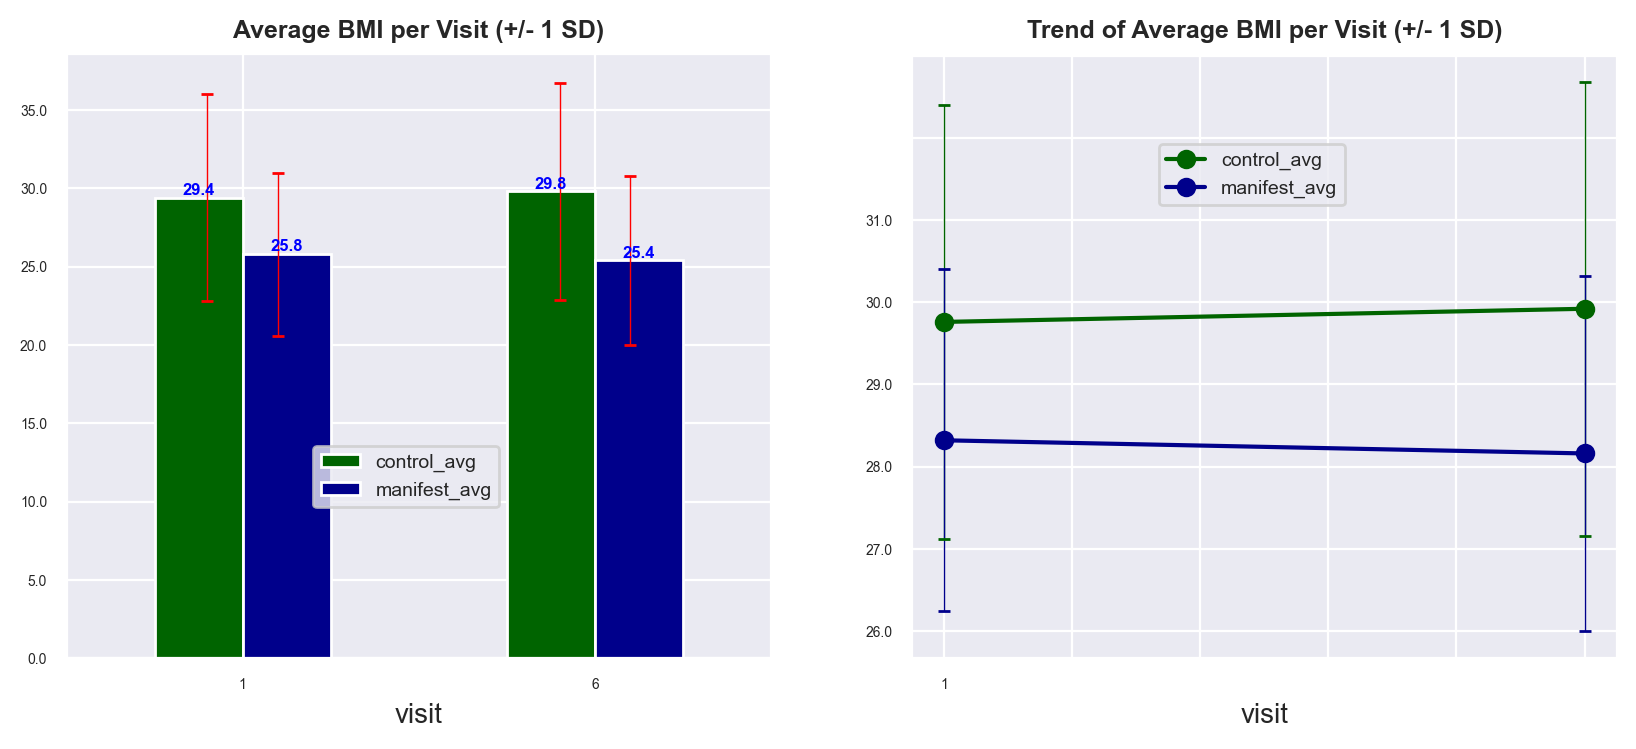

In [38]:
cols = ['visit', 'control_avg', 'manifest_avg']
cmap = {c:'darkgreen' if 'control' in c.lower() else 'darkblue' if 'manifest' in c.lower() else 'gray' for c in cols}
display(avg_bmi[cols])
# ax1 = proj.plot_column(avg_bmi['visit'], avg_bmi['control_avg'], color='green')
fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)

trans1 = Affine2D().translate(-0.1, 0.0) + l.transData
trans2 = Affine2D().translate(+0.1, 0.0) + l.transData

avg_bmi[cols].plot(kind='bar', x='visit', color=cmap, ax=l)
proj.adjust_axis(l, plot_title="Average BMI per Visit (+/- 1 SD)", title_size=9,
                 annotate=True, annot_size=6, show_legend_at=[0.35, 0.25],)
l.errorbar(avg_bmi['visit'], avg_bmi['control_avg'], yerr=avg_bmi['control_std'], 
             fmt='none', capsize=2, elinewidth=0.5, ecolor='red', transform=trans1)
l.errorbar(avg_bmi['visit'], avg_bmi['manifest_avg'], yerr=avg_bmi['manifest_std'], 
             fmt='none', capsize=2, elinewidth=0.5, ecolor='red', transform=trans2)

avg_bmi[cols].plot(kind='line', x='visit', marker='o', color=cmap, ax=r)
proj.adjust_axis(r, plot_title="Trend of Average BMI per Visit (+/- 1 SD)", title_size=9,
                 show_legend_at=[0.35, 0.75],)
r.errorbar(avg_bmi['visit'], avg_bmi['control_avg'], yerr=avg_bmi['control_std'], 
             fmt='none', capsize=2, elinewidth=0.5, ecolor='darkgreen', )#transform=trans1)
r.errorbar(avg_bmi['visit'], avg_bmi['manifest_avg'], yerr=avg_bmi['manifest_std'], 
             fmt='none', capsize=2, elinewidth=0.5, ecolor='darkblue', )#transform=trans2)

In [39]:
# cols = ['seq', 'hd_status0', 'bmi']
# cond = (main_df['hd_status0'].isin(['genotype -ve', 'manifest']))
# df = main_df.loc[cond, cols]
# display(df)

# fig, (l, r) = plt.subplots(1, 2)
# sns.barplot(data=df, x='seq', y='bmi', hue='hd_status0', palette=proj.hd_status_cmap, 
#             ci='sd', capsize=0.1, errwidth=1, ax=l)
# sns.lineplot(data=df, x='seq', y='bmi', hue='hd_status0', palette=proj.hd_status_cmap, 
#              ci='sd', legend=False, ax=r)
# plt.setp(fig, size_inches=[12, 4], dpi=200)
# plt.setp([l, r], xlabel='visit', ylabel='average BMI', title='Average BMI')

In [40]:
# check for relationship
# cols = ['visit', 'control_avg', 'manifest_avg']
# rlshp = pd.DataFrame(avg_bmi[cols])
# rlshp.loc[:, 'visit'] = np.array([1, 6])
# display(rlshp, rlshp.corr())
# proj.plot_correl_heatmap(rlshp, plot_title='Relationship Between Time (Sequential Visits) & Average BMI')

In [41]:
# cols = ['control_avg', 'manifest_avg']
# scaler = s_prep.MinMaxScaler()
# X = pd.DataFrame(scaler.fit_transform(rlshp[cols]), columns=cols)
# y = rlshp['visit']
# display(X, y)
# corrn = proj.corr_with_pearson(X, y, True)
# display(corrn)

In [42]:
# proj.plot_diff(left_side=avg_bmi['control_avg'], right_side=avg_bmi['manifest_avg'], 
#                common_catgs=avg_bmi['visit'], precision=1, left_legend='control', right_legend='manifest',
#               plot_title='Average BMI', left_labe_shift=5.5, right_labe_shift=3,
#                lv_labe_shift=-2, rv_labe_shift=2, xlim=[-10, 5])

# proj.report_a_significance(X1_set=avg_bmi['control_avg'], X2_set=avg_bmi['manifest_avg'],
#                            X1_name='control average BMI', X2_name='manifest average BMI')

#### Gender Effect

In [43]:
# male pps
cols = proj.get_columns_with_pattern(control, 'bmi_vis').columns

col_rename = {0:'control_avg', 'index':'variable'}
ctrl_avg = proj.compute_mean_std_sterr(male_control[cols], 'control', 1).reset_index().rename(columns=col_rename)

col_rename = {0:'manifest_avg', 'index':'variable'}
mnf_avg = proj.compute_mean_std_sterr(male_manifest[cols], 'manifest', 1).reset_index().rename(columns=col_rename)

display(ctrl_avg, mnf_avg)

male_avg_bmi = proj.replace_value_with(pd.merge(ctrl_avg, mnf_avg, on=['variable']), 
                                  replacement_guide={-999:0})
male_avg_bmi.loc[:, 'visit'] = np.array([1, 6]).astype(str)
display(male_avg_bmi)

,variable,control_avg,control_std,control_sterr
0,bmi_vis_1,29.5,5.5,0.5
1,bmi_vis_6,30.0,5.5,0.5


,variable,manifest_avg,manifest_std,manifest_sterr
0,bmi_vis_1,26.1,4.4,0.3
1,bmi_vis_6,25.4,4.7,0.3


,variable,control_avg,control_std,control_sterr,manifest_avg,manifest_std,manifest_sterr,visit
0,bmi_vis_1,29.5,5.5,0.5,26.1,4.4,0.3,1
1,bmi_vis_6,30.0,5.5,0.5,25.4,4.7,0.3,6


In [44]:
# female pps
cols = proj.get_columns_with_pattern(control, 'bmi_vis').columns

col_rename = {0:'control_avg', 'index':'variable'}
ctrl_avg = proj.compute_mean_std_sterr(female_control[cols], 'control', 1).reset_index().rename(columns=col_rename)

col_rename = {0:'manifest_avg', 'index':'variable'}
mnf_avg = proj.compute_mean_std_sterr(female_manifest[cols], 'manifest', 1).reset_index().rename(columns=col_rename)

display(ctrl_avg, mnf_avg)

female_avg_bmi = proj.replace_value_with(pd.merge(ctrl_avg, mnf_avg, on=['variable']), 
                                  replacement_guide={-999:0})
female_avg_bmi.loc[:, 'visit'] = np.array([1, 6]).astype(str)
display(female_avg_bmi)

,variable,control_avg,control_std,control_sterr
0,bmi_vis_1,29.3,7.2,0.5
1,bmi_vis_6,29.6,7.5,0.5


,variable,manifest_avg,manifest_std,manifest_sterr
0,bmi_vis_1,25.5,5.9,0.4
1,bmi_vis_6,25.3,6.1,0.4


,variable,control_avg,control_std,control_sterr,manifest_avg,manifest_std,manifest_sterr,visit
0,bmi_vis_1,29.3,7.2,0.5,25.5,5.9,0.4,1
1,bmi_vis_6,29.6,7.5,0.5,25.3,6.1,0.4,6


,visit,control_avg,manifest_avg
0,1,29.5,26.1
1,6,30.0,25.4


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


,visit,control_avg,manifest_avg
0,1,29.3,25.5
1,6,29.6,25.3


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<ErrorbarContainer object of 3 artists>

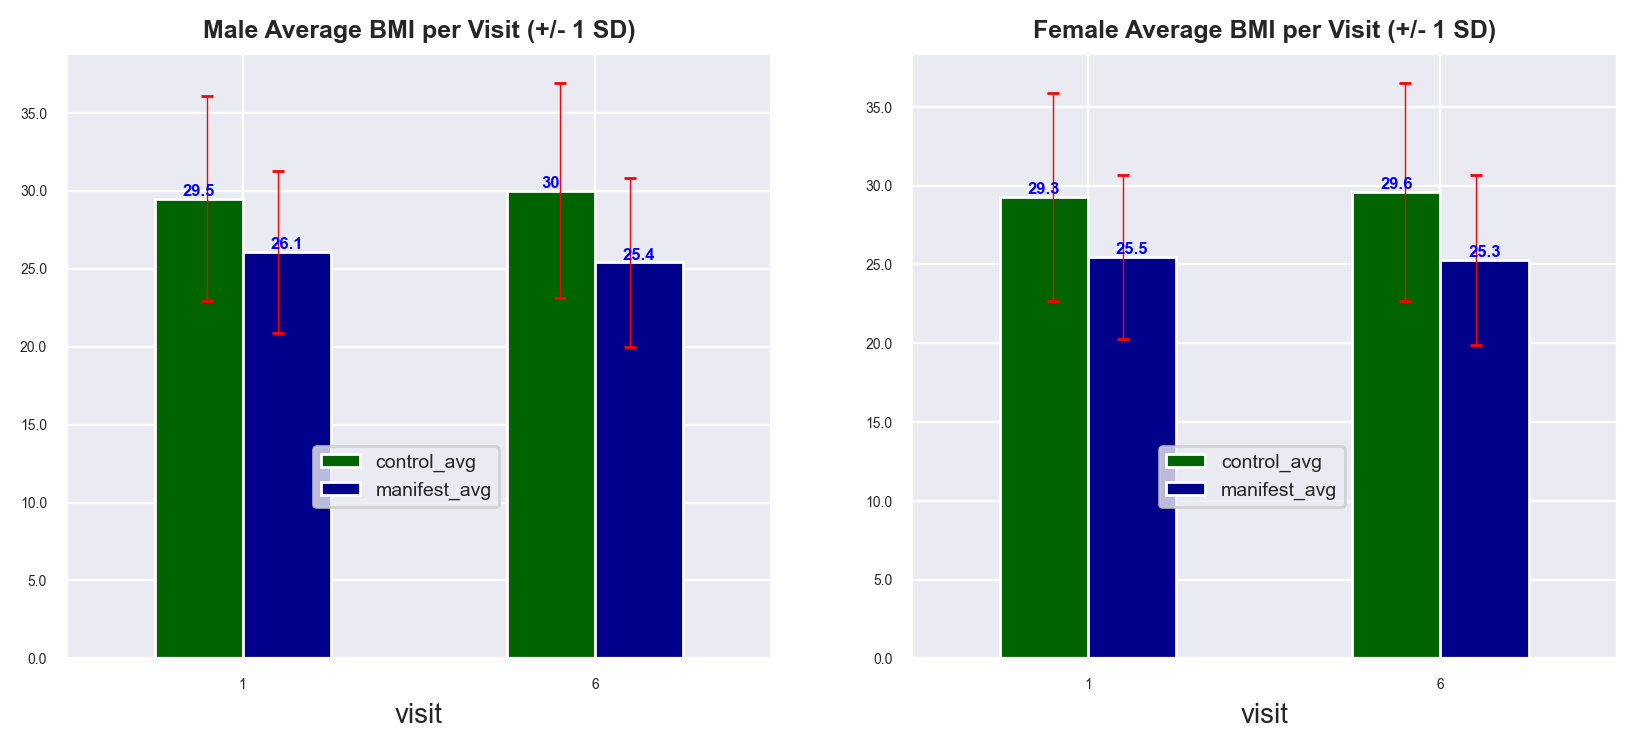

In [45]:
cols = ['visit', 'control_avg', 'manifest_avg']
cmap = {c:'darkgreen' if 'control' in c.lower() else 'darkblue' if 'manifest' in c.lower() else 'gray' for c in cols}
display(male_avg_bmi[cols])
# ax1 = proj.plot_column(male_avg_bmi['visit'], male_avg_bmi['control_avg'], color='green')
fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)

trans1 = Affine2D().translate(-0.1, 0.0) + l.transData
trans2 = Affine2D().translate(+0.1, 0.0) + l.transData

male_avg_bmi[cols].plot(kind='bar', x='visit', color=cmap, ax=l)
proj.adjust_axis(l, plot_title="Male Average BMI per Visit (+/- 1 SD)", title_size=9,
                 annotate=True, annot_size=6, show_legend_at=[0.35, 0.25],)
l.errorbar(male_avg_bmi['visit'], male_avg_bmi['control_avg'], yerr=avg_bmi['control_std'], 
           fmt='none', capsize=2, elinewidth=0.5, ecolor='red', transform=trans1)
l.errorbar(male_avg_bmi['visit'], male_avg_bmi['manifest_avg'], yerr=avg_bmi['manifest_std'], 
           fmt='none', capsize=2, elinewidth=0.5, ecolor='red', transform=trans2)

# male_avg_bmi[cols].plot(kind='line', x='visit', marker='o', color=cmap, ax=r)
# proj.adjust_axis(r, plot_title="Trend of Male Average BMI per Visit (+/- 1 SD)", title_size=9,
#                  show_legend_at=[0.35, 0.75],)
# r.errorbar(male_avg_bmi['visit'], male_avg_bmi['control_avg'], yerr=avg_bmi['control_std'], 
#            fmt='none', capsize=2, elinewidth=0.5, ecolor='darkgreen', )
# r.errorbar(male_avg_bmi['visit'], male_avg_bmi['manifest_avg'], yerr=avg_bmi['manifest_std'], 
#            fmt='none', capsize=2, elinewidth=0.5, ecolor='darkblue', )

display(female_avg_bmi[cols])
# ax1 = proj.plot_column(female_avg_bmi['visit'], female_avg_bmi['control_avg'], color='green')
trans1 = Affine2D().translate(-0.1, 0.0) + r.transData
trans2 = Affine2D().translate(+0.1, 0.0) + r.transData

female_avg_bmi[cols].plot(kind='bar', x='visit', color=cmap, ax=r)
proj.adjust_axis(r, plot_title="Female Average BMI per Visit (+/- 1 SD)", title_size=9,
                 annotate=True, annot_size=6, show_legend_at=[0.35, 0.25],)
r.errorbar(female_avg_bmi['visit'], female_avg_bmi['control_avg'], yerr=avg_bmi['control_std'], 
           fmt='none', capsize=2, elinewidth=0.5, ecolor='red', transform=trans1)
r.errorbar(female_avg_bmi['visit'], female_avg_bmi['manifest_avg'], yerr=avg_bmi['manifest_std'], 
           fmt='none', capsize=2, elinewidth=0.5, ecolor='red', transform=trans2)

# female_avg_bmi[cols].plot(kind='line', x='visit', marker='o', color=cmap, ax=r)
# proj.adjust_axis(r, plot_title="Trend of Female Average BMI per Visit (+/- 1 SD)", title_size=9,
#                  show_legend_at=[0.35, 0.75],)
# r.errorbar(female_avg_bmi['visit'], female_avg_bmi['control_avg'], yerr=avg_bmi['control_std'], 
#              fmt='none', capsize=2, elinewidth=0.5, ecolor='darkgreen', )#transform=trans1)
# r.errorbar(female_avg_bmi['visit'], female_avg_bmi['manifest_avg'], yerr=avg_bmi['manifest_std'], 
#              fmt='none', capsize=2, elinewidth=0.5, ecolor='darkblue', )#transform=trans2)

In [46]:
# proj.plot_diff(left_side=male_avg_bmi['control_avg'], right_side=male_avg_bmi['manifest_avg'], 
#                common_catgs=male_avg_bmi['visit'], precision=1, left_legend='control', right_legend='manifest',
#               plot_title='Average BMI', left_labe_shift=5.5, right_labe_shift=3,
#                lv_labe_shift=-2, rv_labe_shift=2, xlim=[-10, 5])

# proj.report_a_significance(X1_set=male_avg_bmi['control_avg'], X2_set=male_avg_bmi['manifest_avg'],
#                            X1_name='control average BMI', X2_name='manifest average BMI')

In [47]:
# check for relationship
# rlshp = pd.DataFrame(male_avg_bmi[cols])
# rlshp.loc[:, 'visit'] = np.array([1, 6])
# display(rlshp, rlshp.corr())
# proj.plot_correl_heatmap(rlshp, plot_title='Relationship Between Time (Sequential Visits) & Average BMI of Male Participants')

In [48]:
# proj.plot_diff(left_side=female_avg_bmi['control_avg'], right_side=female_avg_bmi['manifest_avg'], 
#                common_catgs=female_avg_bmi['visit'], precision=1, left_legend='control', right_legend='manifest',
#               plot_title='Average BMI', left_labe_shift=5.5, right_labe_shift=3,
#                lv_labe_shift=-2, rv_labe_shift=2, xlim=[-10, 5])

# proj.report_a_significance(X1_set=female_avg_bmi['control_avg'], X2_set=female_avg_bmi['manifest_avg'],
#                            X1_name='control average BMI', X2_name='manifest average BMI')

In [49]:
# check for relationship
# rlshp = pd.DataFrame(female_avg_bmi[cols])
# rlshp.loc[:, 'visit'] = np.array([1, 6])
# display(rlshp, rlshp.corr())
# proj.plot_correl_heatmap(rlshp, plot_title='Relationship Between Time (Sequential Visits) & Average BMI of Female Participants')

### Average BMI per CAG repeat

In [50]:
# normal and intermediate cag
cols = proj.get_columns_with_pattern(control, 'bmi_vis').columns

col_rename = {'index':'variable'}
norm_cag_avg = proj.compute_mean_std_sterr(normcag_c[cols], 'normal', 1).reset_index().rename(columns=col_rename)

col_rename = {'index':'variable'}
intm_cag_avg = proj.compute_mean_std_sterr(intmcag_c[cols], 'intermediate', 1).reset_index().rename(columns=col_rename)

display(norm_cag_avg, intm_cag_avg)

ctrl_avg_bmi = proj.replace_value_with(pd.merge(norm_cag_avg, intm_cag_avg, on=['variable']), 
                                  replacement_guide={-999:0})
ctrl_avg_bmi.loc[:, 'visit'] = np.array([1, 6]).astype(str)
display(ctrl_avg_bmi)

,variable,normal_avg,normal_std,normal_sterr
0,bmi_vis_1,29.2,6.3,0.4
1,bmi_vis_6,29.7,6.8,0.4


,variable,intermediate_avg,intermediate_std,intermediate_sterr
0,bmi_vis_1,31.6,10.8,2.6
1,bmi_vis_6,30.2,7.5,1.8


,variable,normal_avg,normal_std,normal_sterr,intermediate_avg,intermediate_std,intermediate_sterr,visit
0,bmi_vis_1,29.2,6.3,0.4,31.6,10.8,2.6,1
1,bmi_vis_6,29.7,6.8,0.4,30.2,7.5,1.8,6


In [51]:
# reduced and full penetrance cag - manifest
cols = proj.get_columns_with_pattern(manifest, 'bmi_vis').columns

col_rename = {'index':'variable'}
redpen_cag_avg = proj.compute_mean_std_sterr(redpen[cols], 'reduced_penetrance', 1).reset_index().rename(columns=col_rename)

col_rename = {'index':'variable'}
fulpen_cag_avg = proj.compute_mean_std_sterr(fulpen[cols], 'full_penetrance', 1).reset_index().rename(columns=col_rename)

display(redpen_cag_avg, fulpen_cag_avg)

mnf_avg_bmi = proj.replace_value_with(pd.merge(redpen_cag_avg, fulpen_cag_avg, on=['variable']), 
                                  replacement_guide={-999:0})
mnf_avg_bmi.loc[:, 'visit'] = np.array([1, 6]).astype(str)
display(mnf_avg_bmi)

,variable,reduced_penetrance_avg,reduced_penetrance_std,reduced_penetrance_sterr
0,bmi_vis_1,28.5,6.9,1.7
1,bmi_vis_6,28.2,7.2,1.7


,variable,full_penetrance_avg,full_penetrance_std,full_penetrance_sterr
0,bmi_vis_1,25.7,5.1,0.2
1,bmi_vis_6,25.3,5.3,0.2


,variable,reduced_penetrance_avg,reduced_penetrance_std,reduced_penetrance_sterr,full_penetrance_avg,full_penetrance_std,full_penetrance_sterr,visit
0,bmi_vis_1,28.5,6.9,1.7,25.7,5.1,0.2,1
1,bmi_vis_6,28.2,7.2,1.7,25.3,5.3,0.2,6


,visit,normal_avg,intermediate_avg
0,1,29.2,31.6
1,6,29.7,30.2


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


,visit,reduced_penetrance_avg,full_penetrance_avg
0,1,28.5,25.7
1,6,28.2,25.3


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<ErrorbarContainer object of 3 artists>

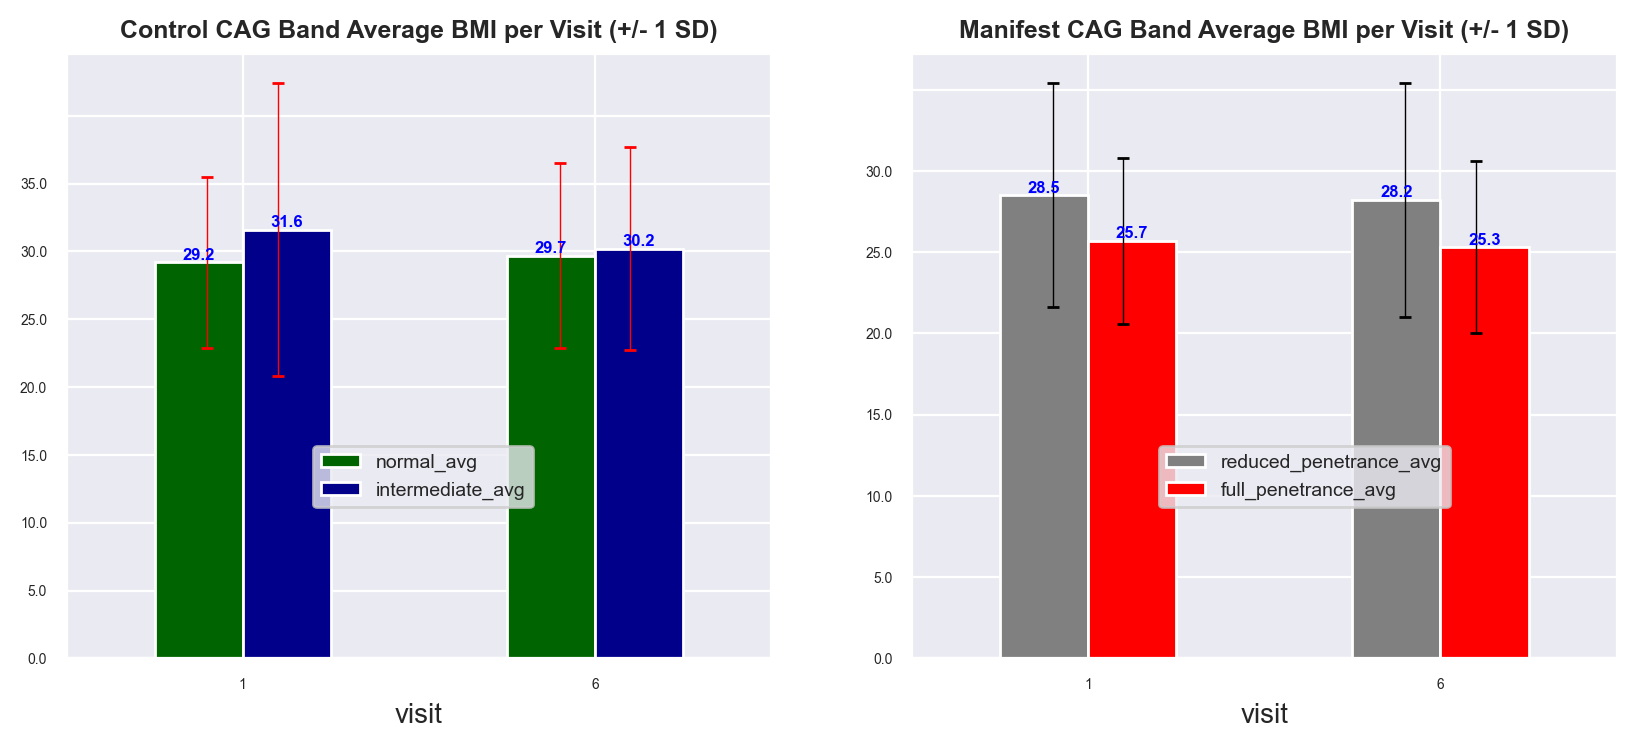

In [52]:
cols = ['visit', 'normal_avg', 'intermediate_avg']
cmap = {c:'darkgreen' if 'normal' in c.lower() else 'darkblue' for c in cols}
display(ctrl_avg_bmi[cols])
# ax1 = proj.plot_column(ctrl_avg_bmi['visit'], ctrl_avg_bmi['normal_avg'], color='green')
fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)

trans1 = Affine2D().translate(-0.1, 0.0) + l.transData
trans2 = Affine2D().translate(+0.1, 0.0) + l.transData

ctrl_avg_bmi[cols].plot(kind='bar', x='visit', color=cmap, ax=l)
proj.adjust_axis(l, plot_title="Control CAG Band Average BMI per Visit (+/- 1 SD)", title_size=9,
                 annotate=True, annot_size=6, show_legend_at=[0.35, 0.25],)
l.errorbar(ctrl_avg_bmi['visit'], ctrl_avg_bmi['normal_avg'], yerr=ctrl_avg_bmi['normal_std'], 
           fmt='none', capsize=2, elinewidth=0.5, ecolor='red', transform=trans1)
l.errorbar(ctrl_avg_bmi['visit'], ctrl_avg_bmi['intermediate_avg'], yerr=ctrl_avg_bmi['intermediate_std'], 
           fmt='none', capsize=2, elinewidth=0.5, ecolor='red', transform=trans2)

cols = ['visit', 'reduced_penetrance_avg', 'full_penetrance_avg']
cmap = {c:'gray' if 'reduced_penetrance' in c.lower() else 'red' for c in cols}
display(mnf_avg_bmi[cols])
trans1 = Affine2D().translate(-0.1, 0.0) + r.transData
trans2 = Affine2D().translate(+0.1, 0.0) + r.transData

mnf_avg_bmi[cols].plot(kind='bar', x='visit', color=cmap, ax=r)
proj.adjust_axis(r, plot_title="Manifest CAG Band Average BMI per Visit (+/- 1 SD)", title_size=9,
                 annotate=True, annot_size=6, show_legend_at=[0.35, 0.25],)
r.errorbar(mnf_avg_bmi['visit'], mnf_avg_bmi['reduced_penetrance_avg'], yerr=mnf_avg_bmi['reduced_penetrance_std'], 
           fmt='none', capsize=2, elinewidth=0.5, ecolor='black', transform=trans1)
r.errorbar(mnf_avg_bmi['visit'], mnf_avg_bmi['full_penetrance_avg'], yerr=mnf_avg_bmi['full_penetrance_std'], 
           fmt='none', capsize=2, elinewidth=0.5, ecolor='black', transform=trans2)

### Statistical Significance from Means

In [53]:
#proj.get_ttest_pvalue_from_array(redpen['bmi_vis_1'], fulpen['bmi_vis_1'], alternative_hypothesis='greater')

In [54]:
# nml pen vs red pen
cols = 'bmi_vis_1'
display(proj.get_ttest_pvalue_from_array(normcag_c[cols], redpen[cols],
                                        alternative_hypothesis='greater'))

cols = 'bmi_vis_6'
display(proj.get_ttest_pvalue_from_array(normcag_c[cols], redpen[cols], 
                                        alternative_hypothesis='greater'))


Equal Variance Detected! -> Student T-Test



{'t_statistic': 0.4553096892414744, 'pvalue': 0.3245985841259075}


Equal Variance Detected! -> Student T-Test



{'t_statistic': 0.8987835473568596, 'pvalue': 0.1847240000941613}

In [55]:
# int pen vs red pen
cols = 'bmi_vis_1'
display(proj.get_ttest_pvalue_from_array(intmcag_c[cols], redpen[cols],
                                        alternative_hypothesis='greater'))

cols = 'bmi_vis_6'
display(proj.get_ttest_pvalue_from_array(intmcag_c[cols], redpen[cols], 
                                        alternative_hypothesis='greater'))


Equal Variance Detected! -> Student T-Test



{'t_statistic': 0.9915919231292025, 'pvalue': 0.16441790876433648}


Equal Variance Detected! -> Student T-Test



{'t_statistic': 0.8087007049278778, 'pvalue': 0.21232963636069307}

In [56]:
# reduced pen vs full pen
cols = 'bmi_vis_1'
display(proj.get_ttest_pvalue_from_array(redpen[cols], fulpen[cols],
                                        alternative_hypothesis='greater'))

cols = 'bmi_vis_6'
display(proj.get_ttest_pvalue_from_array(redpen[cols], fulpen[cols], 
                                        alternative_hypothesis='greater'))


Equal Variance Detected! -> Student T-Test



{'t_statistic': 2.1964680604270073, 'pvalue': 0.014239823048548074}


Equal Variance Detected! -> Student T-Test



{'t_statistic': 2.2146424095785107, 'pvalue': 0.013599134741538932}

### Statistical Significance from Medians

In [57]:
cols = 'bmi_vis_1'
x, y = redpen[cols], fulpen[cols]
display(x.median(), y.median())
xstt = proj.compute_median_std_sterr(x, group_name='redpen', precision=1)
ystt = proj.compute_median_std_sterr(y, group_name='fulpen', precision=1)
display(xstt, ystt)

# reduced penetrance median BMI is significantly greater than full penetrance median BMI
proj.get_ttest_pvalue_from_stats(X1_mean=xstt['redpen_median'].values, X1_std=xstt['redpen_std'].values, X1_count=len(x),
                           X2_mean=ystt['fulpen_median'].values, X2_std=ystt['fulpen_std'].values, X2_count=len(y),
                           alternative_hypothesis='greater')

25.4

25.1

,redpen_median,redpen_std,redpen_sterr
0,25.4,7.6,1.8


,fulpen_median,fulpen_std,fulpen_sterr
0,25.1,5.1,0.2



Equal Variance Detected! -> Student T-Test



{'t_statistic': array([0.23455658]), 'pvalue': array([0.40732058])}

In [58]:
cols = 'bmi_vis_6'
x, y = redpen[cols], fulpen[cols]

xstt = proj.compute_median_std_sterr(x, group_name='redpen', precision=1)
ystt = proj.compute_median_std_sterr(y, group_name='fulpen', precision=1)
display(xstt, ystt)

# reduced penetrance median BMI is significantly greater than full penetrance median BMI
proj.get_ttest_pvalue_from_stats(X1_mean=xstt['redpen_median'].values, X1_std=xstt['redpen_std'].values, X1_count=len(x),
                           X2_mean=ystt['fulpen_median'].values, X2_std=ystt['fulpen_std'].values, X2_count=len(y),
                           alternative_hypothesis='greater')

,redpen_median,redpen_std,redpen_sterr
0,26.1,7.5,1.8


,fulpen_median,fulpen_std,fulpen_sterr
0,24.5,5.4,0.2



Equal Variance Detected! -> Student T-Test



{'t_statistic': array([1.1863928]), 'pvalue': array([0.11799254])}

In [59]:
cols = 'bmi_vis_1'
x, y = intmcag_c[cols], fulpen[cols]

xstt = proj.compute_median_std_sterr(x, group_name='redpen', precision=1)
ystt = proj.compute_median_std_sterr(y, group_name='fulpen', precision=1)
display(xstt, ystt)

# reduced penetrance median BMI is significantly greater than full penetrance median BMI
proj.get_ttest_pvalue_from_stats(X1_mean=xstt['redpen_median'].values, X1_std=xstt['redpen_std'].values, X1_count=len(x),
                           X2_mean=ystt['fulpen_median'].values, X2_std=ystt['fulpen_std'].values, X2_count=len(y),
                           alternative_hypothesis='greater')

,redpen_median,redpen_std,redpen_sterr
0,28.3,11.3,2.7


,fulpen_median,fulpen_std,fulpen_sterr
0,25.1,5.1,0.2



Equal Variance Detected! -> Student T-Test



{'t_statistic': array([2.41158487]), 'pvalue': array([0.00810678])}

In [60]:
cols = 'bmi_vis_6'
x, y = intmcag_c[cols], fulpen[cols]

xstt = proj.compute_median_std_sterr(x, group_name='redpen', precision=1)
ystt = proj.compute_median_std_sterr(y, group_name='fulpen', precision=1)
display(xstt, ystt)

# reduced penetrance median BMI is significantly greater than full penetrance median BMI
proj.get_ttest_pvalue_from_stats(X1_mean=xstt['redpen_median'].values, X1_std=xstt['redpen_std'].values, X1_count=len(x),
                           X2_mean=ystt['fulpen_median'].values, X2_std=ystt['fulpen_std'].values, X2_count=len(y),
                           alternative_hypothesis='greater')

,redpen_median,redpen_std,redpen_sterr
0,27.9,7.9,1.9


,fulpen_median,fulpen_std,fulpen_sterr
0,24.5,5.4,0.2



Equal Variance Detected! -> Student T-Test



{'t_statistic': array([2.51349544]), 'pvalue': array([0.00612096])}

In [61]:
cols = 'bmi_vis_1'
x, y = normcag_c[cols], fulpen[cols]

xstt = proj.compute_median_std_sterr(x, group_name='redpen', precision=1)
ystt = proj.compute_median_std_sterr(y, group_name='fulpen', precision=1)
display(xstt, ystt)

# reduced penetrance median BMI is significantly greater than full penetrance median BMI
proj.get_ttest_pvalue_from_stats(X1_mean=xstt['redpen_median'].values, X1_std=xstt['redpen_std'].values, X1_count=len(x),
                           X2_mean=ystt['fulpen_median'].values, X2_std=ystt['fulpen_std'].values, X2_count=len(y),
                           alternative_hypothesis='greater')

,redpen_median,redpen_std,redpen_sterr
0,27.9,6.5,0.4


,fulpen_median,fulpen_std,fulpen_sterr
0,25.1,5.1,0.2



Equal Variance Detected! -> Student T-Test



{'t_statistic': array([6.87892854]), 'pvalue': array([5.93576052e-12])}

In [62]:
cols = 'bmi_vis_6'
x, y = intmcag_c[cols], fulpen[cols]

xstt = proj.compute_median_std_sterr(x, group_name='redpen', precision=1)
ystt = proj.compute_median_std_sterr(y, group_name='fulpen', precision=1)
display(xstt, ystt)

# reduced penetrance median BMI is significantly greater than full penetrance median BMI
proj.get_ttest_pvalue_from_stats(X1_mean=xstt['redpen_median'].values, X1_std=xstt['redpen_std'].values, X1_count=len(x),
                           X2_mean=ystt['fulpen_median'].values, X2_std=ystt['fulpen_std'].values, X2_count=len(y),
                           alternative_hypothesis='greater')

,redpen_median,redpen_std,redpen_sterr
0,27.9,7.9,1.9


,fulpen_median,fulpen_std,fulpen_sterr
0,24.5,5.4,0.2



Equal Variance Detected! -> Student T-Test



{'t_statistic': array([2.51349544]), 'pvalue': array([0.00612096])}

In [63]:
cols = 'bmi_vis_1'
x, y = intmcag_c[cols], redpen[cols]

xstt = proj.compute_median_std_sterr(x, group_name='redpen', precision=1)
ystt = proj.compute_median_std_sterr(y, group_name='fulpen', precision=1)
display(xstt, ystt)

# reduced penetrance median BMI is significantly greater than full penetrance median BMI
proj.get_ttest_pvalue_from_stats(X1_mean=xstt['redpen_median'].values, X1_std=xstt['redpen_std'].values, X1_count=len(x),
                           X2_mean=ystt['fulpen_median'].values, X2_std=ystt['fulpen_std'].values, X2_count=len(y),
                           alternative_hypothesis='greater')

,redpen_median,redpen_std,redpen_sterr
0,28.3,11.3,2.7


,fulpen_median,fulpen_std,fulpen_sterr
0,25.4,7.6,1.8



Equal Variance Detected! -> Student T-Test



{'t_statistic': array([0.87802936]), 'pvalue': array([0.19323646])}

In [64]:
cols = 'bmi_vis_6'
x, y = intmcag_c[cols], redpen[cols]

xstt = proj.compute_median_std_sterr(x, group_name='redpen', precision=1)
ystt = proj.compute_median_std_sterr(y, group_name='fulpen', precision=1)
display(xstt, ystt)

# reduced penetrance median BMI is significantly greater than full penetrance median BMI
proj.get_ttest_pvalue_from_stats(X1_mean=xstt['redpen_median'].values, X1_std=xstt['redpen_std'].values, X1_count=len(x),
                           X2_mean=ystt['fulpen_median'].values, X2_std=ystt['fulpen_std'].values, X2_count=len(y),
                           alternative_hypothesis='greater')

,redpen_median,redpen_std,redpen_sterr
0,27.9,7.9,1.9


,fulpen_median,fulpen_std,fulpen_sterr
0,26.1,7.5,1.8



Equal Variance Detected! -> Student T-Test



{'t_statistic': array([0.68131005]), 'pvalue': array([0.25028826])}

In [65]:
cols = 'bmi_vis_1'
x, y = redpen[cols], fulpen[cols]

xstt = proj.compute_median_std_sterr(x, group_name='redpen', precision=1)
ystt = proj.compute_median_std_sterr(y, group_name='fulpen', precision=1)
display(xstt, ystt)

# reduced penetrance median BMI is significantly greater than full penetrance median BMI
proj.get_ttest_pvalue_from_stats(X1_mean=xstt['redpen_median'].values, X1_std=xstt['redpen_std'].values, X1_count=len(x),
                           X2_mean=ystt['fulpen_median'].values, X2_std=ystt['fulpen_std'].values, X2_count=len(y),
                           alternative_hypothesis='greater')

,redpen_median,redpen_std,redpen_sterr
0,25.4,7.6,1.8


,fulpen_median,fulpen_std,fulpen_sterr
0,25.1,5.1,0.2



Equal Variance Detected! -> Student T-Test



{'t_statistic': array([0.23455658]), 'pvalue': array([0.40732058])}

In [66]:
stopt

NameError: name 'stopt' is not defined